In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import networkx as nx # used to create the graphs
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz # used to compare TWO strings
from fuzzywuzzy import process # used to compare a string to MULTIPLE other strings


%matplotlib inline

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [2]:
pts = pd.read_csv('../data/playlists_tracks.csv')
pts.sample(n=5)

,playlist_id,added_at,added_by_id,isrc,artists,explicit,track_id,name,popularity,preview_url,album_type,album_id,album_name,release_date,genre,description
494190,4sghNjSZeUx5DFTADuPhPj,2019-07-19T16:21:24Z,thesoundsofspotify,MXF011300419,[{'external_urls': {'spotify': 'https://open.s...,False,1vrq0gc8U6kxkNNnD79gEp,Corazones Invencibles,65.0,https://p.scdn.co/mp3-preview/e29fa0d603b9cf81...,album,6UlH9VLq1S6TJtY0xojINt,Romántico Desliz,2014-06-24,Mexican Pop,"See also <a href=""spotify:playlist:6rQdjJzzxnf..."
95431,64rpUcla6sbXJFkaOAq1qu,2019-08-29T17:04:52Z,thesoundsofspotify,SE5IB1701066,[{'external_urls': {'spotify': 'https://open.s...,False,3AYEHr6hL0nOHxMrP5UiCu,Can You Feel The Love Tonight,60.0,https://p.scdn.co/mp3-preview/33039b5f5c2d304f...,single,1gpSsZXNXdGb2FujzivQHD,Modern Classics,2017-04-26,Calming Instrumental,"See also <a href=""spotify:playlist:0B8zTlmDsZh..."
436296,546dyL0xeFMd4eDVT9bE7m,2020-03-06T17:52:33Z,thesoundsofspotify,ushm21534887,[{'external_urls': {'spotify': 'https://open.s...,False,0n5D3peov4Z7RCpT5TKu7m,Moments of Glory,1.0,https://p.scdn.co/mp3-preview/7aecfc9643a0862c...,album,5nkJsAUpCD1n1hMCsvJxXy,Fear Beneath Our Feet,2014-09-04,Kansas Indie,"See also the Sounds of <a href=""spotify:playli..."
590073,7pG25ZvJoouVIKkbGoA4kT,2018-10-17T14:42:09Z,thesoundsofspotify,PLE351300017,[{'external_urls': {'spotify': 'https://open.s...,False,0e4vhaTwHF1WxjgiOIe5Cs,Struggle,11.0,https://p.scdn.co/mp3-preview/96c64143601e65a2...,single,1pGnJEUc5DntQK9OxubgUg,Worship Nothing,2014-02-03,Polish Ambient,"See also the Sounds of <a href=""spotify:playli..."
266252,0Fz9zaKbug4gw1xTvmTUWI,2020-04-10T17:36:14Z,thesoundsofspotify,QZFZ62018644,[{'external_urls': {'spotify': 'https://open.s...,False,7q5wgEVwBWXPxHuHuRimMi,bittersweet,28.0,https://p.scdn.co/mp3-preview/198bd69a0d47cf26...,single,48hp5s38QomzcSx81a2viJ,bittersweet,2020-03-09,Emo Rap,"See also <a href=""spotify:playlist:4Dg5M75OMI1..."


I will need to construct an adjacency matrix for song-level, artist-level, playlist-level, and genre-level incluence networks.  

I will start by creating the song-level adjacency matrix.

In [4]:
"""
For song-level, I need to create (genre, track id) pairs where genre is the target and track id is the source. 
Note, track ids can appear in multiple genres. Each row is an edge.   
"""
col_target = 'genre'
col_source = 'track_id'

# test on a subset of the data first
# I've elected to select all the tracks from the top 5 genres wrt track count 
df = pts.loc[pts.genre.isin(pts.genre.value_counts().nlargest(50).index.tolist()), :]
print(df.genre.nunique(), df.shape)
df.sample(5)

# 1. Create the graph
g = nx.from_pandas_edgelist(df.loc[:, [col_source, col_target]], 
                            source=col_target, target=col_source)

print(len(g.nodes))

50 (41599, 16)
29315


In [5]:
df.track_id.nunique()

29264

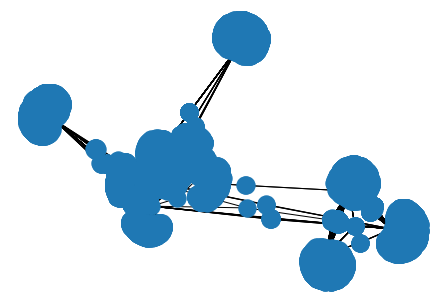

In [68]:
nx.draw(g)

In [112]:
g.edges()

EdgeView([(' Indie Folk', '6WsgELUOvr9rf3XWolZYjc'), (' Indie Folk', '0WVCw4DuZ5GliVNUyyNmS2'), (' Indie Folk', '2AF5Kzxb4pz7j79Ity84pP'), (' Indie Folk', '7IIYtMMgNqnHVYs2ZP4yfC'), (' Indie Folk', '2a69GIAmyBciRjmCquCDPZ'), (' Indie Folk', '6W49z468BT75GsO2tCcBtq'), (' Indie Folk', '250RLekaiL1q9qZer975Eg'), (' Indie Folk', '7rZWxEyFMKmlyrKgAOWOIK'), (' Indie Folk', '1W3WoQ2ECZzQnpOEt3XZVK'), (' Indie Folk', '2QPgkd7IteBb7ONLgTQ5nc'), (' Indie Folk', '4zysTI8NXze7QHfHL4TXz0'), (' Indie Folk', '30BHjsg4A0eERt7ILu7DHy'), (' Indie Folk', '0X61Ud5Uzv44RvY3s1SsuO'), (' Indie Folk', '1wcAKUbAyMRy0uSsFbyiCv'), (' Indie Folk', '3mlMGktVNhAatqEUrLpIWC'), (' Indie Folk', '3ihp0qYSN89GBnrgF6GhRh'), (' Indie Folk', '77mT8LF6gDOLZNOjUhmwfV'), (' Indie Folk', '1G60WXzC3WuCiJXiY0vlrf'), (' Indie Folk', '7MW0vSCN9g2T5eConVGEsO'), (' Indie Folk', '7d0XkI4iJ32nxeFAHFXbLQ'), (' Indie Folk', '2Yf3wwS48rkAoBRXNJ34kz'), (' Indie Folk', '1H56ffyFrFcvMEWUg3WFbM'), (' Indie Folk', '1WXVfFRD89EtVURD4Tbixo'), (

In [159]:
# g.has_edge('Dance Pop')

TypeError: has_edge() missing 1 required positional argument: 'v'

In [79]:
"""
For song-level, I need to create (genre, track id) pairs where genre is the target and track id is the source. 
Note, track ids can appear in multiple genres. Each row is an edge.   
"""
col_target = 'genre'
col_source = 'track_id'

# test on a subset of the data first
# I've elected to select all the tracks from the top 5 genres wrt track count 
df = pts.loc[pts.genre.isin(pts.genre.value_counts().nlargest(10).index.tolist()), :]
print(df.genre.nunique(), df.shape)
df.sample(5)

# 1. Create the graph
g2 = nx.from_pandas_edgelist(df.sample(5000).loc[:, [col_source, col_target]], 
                            source=col_target, target=col_source)

10 (10204, 16)


In [81]:
g2.nodes

NodeView((' Pop', '0x4GHzCjY5MGQ960CHnVHz', ' Rap', '4G3dZN9o3o2X4VKwt4CLts', ' Rock', '6GG73Jik4jUlQCkKg9JuGO', '16XiTUC2rQvb5lmtOm3FYY', ' Latin', '6dZDBFRYElQx4DY1q62r30', '0gSBSVrek88L0xnSUQwlst', '7tjlKy75efLaSz5JYJq9Ru', ' Dance Pop', '2d6kU8J16F3fqpbYKZiLP3', ' Pop Rap', '5PXhYXlPf6CCGrSeZEmJZH', '3VodZKgEgufsPL8MZ0c0tD', ' Hip Hop', '6e6lDhigjHGm6zQM3C1ezN', '6gBFPUFcJLzWGx4lenP6h2', ' Indie Folk', '1Lp1uBloFHEkXmpjx5IqT2', '4keoy2fqgwGnbWlm3ZVZFa', '5a251qN4R86hro8UZGuO4E', '2TZ1apxMDlubCGMsOxcTbT', '4o1DxRjMCHDwBiOKv88rOl', ' Indie Rock', '6gYlvWQEUv9sHwF2BvkQXr', '733c1CWmIGymoQXdp7Us88', '4iuQ88fgaqBRkzb1JWKUbZ', '4M6HNRHyV2MykKp7gKQcyD', '7wsmIIm0xWmtP7TmACXkJn', '7FYH5AW3bVfZHJIQpq3UOA', '1aDNYyeU62BuQsBAY18i48', '30sRAEKuzybaAvhjEBmppp', '5yAu4njFSdM47dfsTkQPZ2', '1dA9GzuP546CjJT0n9tZoe', '35Ycb1cMPK6tyNMsTepijg', '0Ss50OU9tCozI7JIywkv14', '6EpAB8a1Cj7L2V1z5wGr4o', '7w3Y0syREax51MdVmxIGR4', '6KioOiN7xTcjhlYC88qkgb', ' Electro House', '2UKJQ77iYBntfaiuIdIcUF', '0tFscEe2fM

In [155]:
# degree centrality
deg_cent = nx.degree_centrality(g)

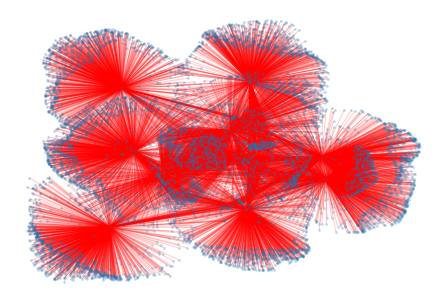

In [97]:
pos = nx.spring_layout(g, iterations=10)
nx.draw(g, pos, alpha=0.2, edge_color="r", font_size=16, with_labels=False)
plt.show()

In [164]:
pos = nx.spring_layout(g, iterations=50)

{' Anthem Worship': Text(0.9512346982955933, 0.12818077206611633, ' Anthem Worship'),
 ' Chamber Pop': Text(-0.10661253333091736, 0.05398072674870491, ' Chamber Pop'),
 ' Classical Performance': Text(-0.6720711588859558, 0.6803681254386902, ' Classical Performance'),
 ' Country Rock': Text(-0.1861291080713272, -0.01710120216012001, ' Country Rock'),
 ' Dance Pop': Text(0.10273395478725433, -0.09022092074155807, ' Dance Pop'),
 ' Electro House': Text(-0.17004460096359253, -0.2848626375198364, ' Electro House'),
 ' Electropop': Text(0.018004093319177628, -0.06647190451622009, ' Electropop'),
 ' Folk Rock': Text(-0.15548430383205414, -0.0029137502424418926, ' Folk Rock'),
 ' French Hip Hop': Text(-0.8640328645706177, 0.2874242663383484, ' French Hip Hop'),
 ' Funk': Text(0.05043423920869827, 0.20009787380695343, ' Funk'),
 ' German Hip Hop': Text(0.24971650540828705, -0.40415871143341064, ' German Hip Hop'),
 ' German Rock': Text(-0.3300047814846039, -0.32964077591896057, ' German Rock'),

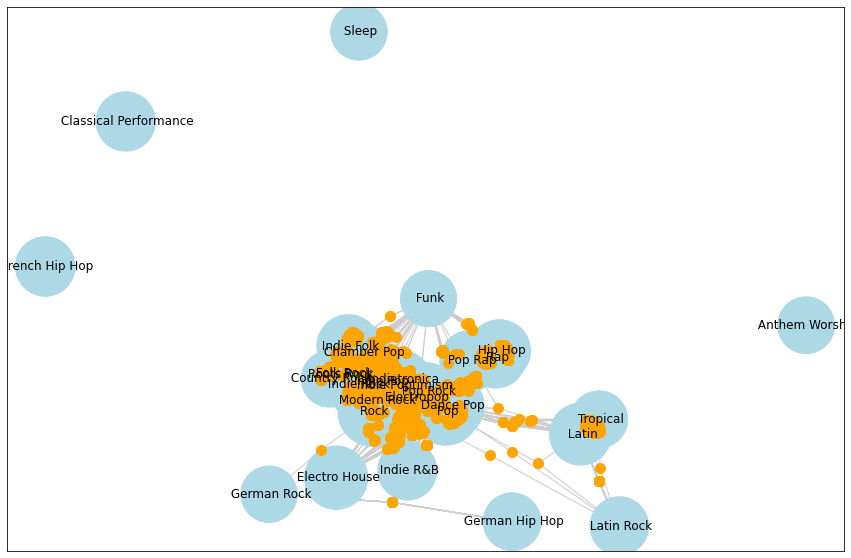

In [165]:
genres = df.genre.unique()
track_ids = df.track_id.unique()

plt.figure(figsize=(15, 10))
node_size = [g.degree(genre) * 4 for genre in genres]
nx.draw_networkx_nodes(g, 
                       pos, 
                       nodelist=genres, 
                       node_size=node_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# # Draw EVERYONE
# nx.draw_networkx_nodes(g, pos, nodelist=track_ids, node_color='#cccccc', node_size=100)

# Draw POPULAR tracks
# popular_track_ids = [track_id for track_id in track_ids if g.degree(track_id) > 1]
popular_track_ids = []
for track_id in track_ids:
    if isinstance(g.degree(track_id), int):
        if g.degree(track_id) > 1:
            popular_track_ids.append(track_id)
        
nx.draw_networkx_nodes(g, pos, nodelist=popular_track_ids, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, pos, width=1, edge_color="#cccccc")

node_labels = dict(zip(genres, genres))
nx.draw_networkx_labels(g, pos, labels=node_labels);


In [166]:
df = pts.loc[pts.genre.isin(pts.genre.value_counts().nlargest(50).index.tolist()), :]
print(df.genre.nunique(), df.shape)
df.sample(5)

# 1. Create the graph
g50 = nx.from_pandas_edgelist(df.loc[:, [col_source, col_target]], 
                            source=col_target, target=col_source)


50 (41599, 16)


In [ ]:
pos2 = nx.spring_layout(g50, iterations=50)

In [169]:
def make_graph(n_largest=10, iters=10):
    
    df = pts.loc[pts.genre.isin(pts.genre.value_counts().nlargest(n_largest).index.tolist()), :]
    print(df.genre.nunique(), df.shape)
    
    # 1. Create the graph
    g = nx.from_pandas_edgelist(df.loc[:, [col_source, col_target]], 
                                source=col_target, target=col_source)
    pos = nx.spring_layout(g, iterations=iters)    
    
    genres = df.genre.unique()
    track_ids = df.track_id.unique()

    plt.figure(figsize=(15, 10))
    node_size = [g.degree(genre) * 4 for genre in genres]
    nx.draw_networkx_nodes(g, 
                           pos, 
                           nodelist=genres, 
                           node_size=node_size, # a LIST of sizes, based on g.degree
                           node_color='lightblue')

    # # Draw EVERYONE
    # nx.draw_networkx_nodes(g, pos, nodelist=track_ids, node_color='#cccccc', node_size=100)

    # Draw POPULAR tracks
    # popular_track_ids = [track_id for track_id in track_ids if g.degree(track_id) > 1]
    popular_track_ids = []
    for track_id in track_ids:
        if isinstance(g.degree(track_id), int):
            if g.degree(track_id) > 1:
                popular_track_ids.append(track_id)

    nx.draw_networkx_nodes(g, pos, nodelist=popular_track_ids, node_color='orange', node_size=100)

    nx.draw_networkx_edges(g, pos, width=1, edge_color="#cccccc")

    node_labels = dict(zip(genres, genres))
    nx.draw_networkx_labels(g, pos, labels=node_labels);
    plt.show()
    
    return {'graph': g, 'pos': pos, 'df': df}


50 (41599, 16)


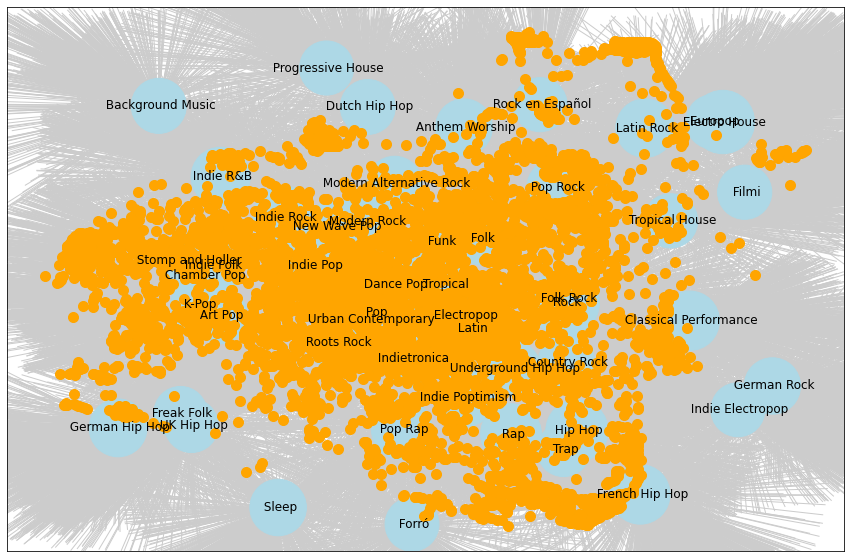

In [174]:
res1 = make_graph(n_largest=50, iters=10)

In [173]:
d['graph'].degree()

DegreeView({' Dance Pop': 1135, '6I9VzXrHxO9rA9A5euc8Ak': 1, '0GWYApQBwErVPkyXYCTJjI': 1, '3Q4WeJmzxuDpzMu9QjQqbM': 1, '0Oe49j06Bjrxs8PltuVeaW': 1, '0HPD5WQqrq7wPWR7P7Dw1i': 1, '6SkoBaMd0lzoQjID5aV2d9': 1, '0LzrhCZFXW94Y8nwtTuRlw': 1, '3TGRqZ0a2l1LRblBkJoaDx': 1, '47aQT2aV12TyilaoYi1NiD': 1, '1Je1IMUlBXcx1Fz0WE7oPT': 1, '7ydjUPZFQVYZ54NLmoISfG': 1, '11mwFrKvLXCbcVGNxffGyP': 1, '6cy3ki60hLwimwIje7tALf': 1, '3hc7PLcmuZbJGPjhIore1i': 1, '4tCtwWceOPWzenK2HAIJSb': 1, '6kex4EBAj0WHXDKZMEJaaF': 1, '0laYHRpNTS6i8FXdupHkJ4': 1, '5PYQUBXc7NYeI1obMKSJK0': 1, '1jUA4rb6ZCv4gby4YU53xq': 1, '3lSDIJ2abCrOdDJ6pshUap': 1, '4J6zcs7YMYiKBLjJUPMHLc': 1, '7wZUrN8oemZfsEd1CGkbXE': 1, '2iJuuzV8P9Yz0VSurttIV5': 1, '6D60klaHqbCl9ySc8VcRss': 1, '2TZ1apxMDlubCGMsOxcTbT': 1, '2SPEg45ZaUFJCg9GwNmRvw': 1, '4Hsn8y4PcSU6bm9bLB1gwy': 1, '1hGy2eLcmC8eKx7qr1tOqx': 1, '2Cu5ExXidcoE4vF5hIYict': 1, '2pX5qSgxQFwlrkjxph8fxb': 1, '1HwpWwa6bnqqRhK8agG4RS': 1, '7H6ev70Weq6DdpZyyTmUXk': 1, '1DqdF42leyFIzqNDv9CjId': 1, '5mu1uv8Rmz

## Try with RAPIDS GPU support

In [3]:
import cugraph
import cudf

In [4]:
# reduce size by taking random sample of tracks from each genre
genre_groups = pts.groupby('genre')

# genre_groups.count().nlargest(n=5, columns='playlist_id')
# genre_groups.count().nsmallest(n=5, columns='playlist_id')

# randomly select track ids from each genre 
track_ids = genre_groups.apply(lambda x: x.track_id.sample(frac=0.2)).reset_index().track_id.values
print(track_ids.shape)

# create graph with sampled subset 
subset = pts.loc[pts.track_id.isin(track_ids), :].copy().reset_index(drop=True)
subset

(164410,)


,playlist_id,added_at,added_by_id,isrc,artists,explicit,track_id,name,popularity,preview_url,album_type,album_id,album_name,release_date,genre,description
0,2HUpNZLoYHe0Sa9dglqQOg,2019-04-12T15:22:27Z,NaN,NaN,[{'external_urls': {'spotify': 'https://open.s...,False,2EFYDHYQL6K0GYmTKa5wSV,Hitzaurre Bi: I. —,1.0,https://p.scdn.co/mp3-preview/4fe4e9a3e433715d...,NaN,NaN,NaN,NaN,21st Century Classical,"See also <a href=""spotify:playlist:2lLYEZTqN65..."
1,2HUpNZLoYHe0Sa9dglqQOg,2019-11-29T16:13:39Z,NaN,NaN,[{'external_urls': {'spotify': 'https://open.s...,False,0AyzTmZzpdrAgXuHS64omU,Preludio para Madrid '92,2.0,https://p.scdn.co/mp3-preview/f41cac39b76f7ca9...,NaN,NaN,NaN,NaN,21st Century Classical,"See also <a href=""spotify:playlist:2lLYEZTqN65..."
2,2HUpNZLoYHe0Sa9dglqQOg,2020-03-27T17:23:04Z,NaN,NaN,[{'external_urls': {'spotify': 'https://open.s...,False,7LGWbhUgH5kgPnvM3yD67w,Bass Clarinet Quintet: I. —,0.0,https://p.scdn.co/mp3-preview/b62fe4a92e497f4d...,NaN,NaN,NaN,NaN,21st Century Classical,"See also <a href=""spotify:playlist:2lLYEZTqN65..."
3,2HUpNZLoYHe0Sa9dglqQOg,2017-10-14T23:50:49Z,NaN,NaN,[{'external_urls': {'spotify': 'https://open.s...,False,1r6e6W8Mnm1nzo9BNrcAdN,Schumann - Phantasie: II. Triumphbogen (after ...,22.0,https://p.scdn.co/mp3-preview/4cff6f182064a6a1...,NaN,NaN,NaN,NaN,21st Century Classical,"See also <a href=""spotify:playlist:2lLYEZTqN65..."
4,2HUpNZLoYHe0Sa9dglqQOg,2019-09-09T18:37:49Z,NaN,NaN,[{'external_urls': {'spotify': 'https://open.s...,False,2uWChVwiumwZvleNtPr600,Story Teller: I. Schaukel,0.0,https://p.scdn.co/mp3-preview/8ae9a7a6ab9b3511...,NaN,NaN,NaN,NaN,21st Century Classical,"See also <a href=""spotify:playlist:2lLYEZTqN65..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286508,77gJkpOhPm32Ly0QLnFdsw,2020-04-10T15:22:58Z,thesoundsofspotify,EGA0A1700010,[{'external_urls': {'spotify': 'https://open.s...,False,6xAvOnSrkGbJPcDBqQtJiU,العب يلا,46.0,https://p.scdn.co/mp3-preview/a32f1cd4f0ac4f3c...,single,5YZi3isgZPVOzi1hyQ8DJz,العب يلا,2017-09-19,Palestine,"The songs that define, unite and distinguish P..."
286509,77gJkpOhPm32Ly0QLnFdsw,2020-03-13T16:21:36Z,thesoundsofspotify,QZ4UU1901095,[{'external_urls': {'spotify': 'https://open.s...,False,20pMd4bZ5Mq88VSkcJL6FO,Money,43.0,https://p.scdn.co/mp3-preview/58ce4d0035ff7967...,single,6rUrWpcE8y3lZSwnJHbjtw,Money,2019-11-29,Palestine,"The songs that define, unite and distinguish P..."
286510,6fNg78Zw3AvwFoIWCewzH4,2020-04-03T16:53:52Z,thesoundsofspotify,QZDA42007207,[{'external_urls': {'spotify': 'https://open.s...,True,1hwayMnhMj6S73VvhziKi3,It's Funny,9.0,https://p.scdn.co/mp3-preview/39ccc04e1048b0b4...,album,3qkEbRHPHrGpLuuIT6OZ7S,Constant Shift,2020-03-27,Saint Lucia,"The songs that define, unite and distinguish S..."
286511,0BL9IlDFq4MKkxh2cBLGyF,2019-09-27T15:15:57Z,thesoundsofspotify,FR10S1913721,[{'external_urls': {'spotify': 'https://open.s...,True,1LbwRZkkwgrfLH7ColVjTb,LMSK,21.0,https://p.scdn.co/mp3-preview/2e5f29d429c47c38...,single,5XmR7NabocgK9TsncVyRqU,LMSK,2019-01-14,Saint-Martin,"The songs that define, unite and distinguish S..."


In [165]:
# prepare data for cuGraph

# 1) drop any rows with nulls in columns the source (track_id) and destination (genre) columns
subset = subset.dropna(subset=['track_id', 'genre'])
subset['genre'] = subset['genre'].str.strip()
subset['track_id'] = subset['track_id'].str.strip()


# 2) make source and destination columns as ints to make our life easier later on
# src = track_id
subset['src_int'] = subset['track_id'].astype('category').cat.codes
# dst = genre 
subset['dst_int'] = subset['genre'].astype('category').cat.codes + subset['src_int'].max()

# just in case there are stragglers...drop any rows with nulls in the src and dest columns
subset = subset.dropna(subset=['src_int', 'dst_int'])

# make new smaller df with only the columns we care about. This step makes our life easier
df = subset.loc[:, ['track_id', 'genre', 'src_int', 'dst_int']].copy()
df = df.rename(columns={'track_id': 'src', 'genre': 'dst'})
df.head()

,src,dst,src_int,dst_int
0,2EFYDHYQL6K0GYmTKa5wSV,21st Century Classical,42537,147625
1,0AyzTmZzpdrAgXuHS64omU,21st Century Classical,3431,147625
2,7LGWbhUgH5kgPnvM3yD67w,21st Century Classical,139127,147625
3,1r6e6W8Mnm1nzo9BNrcAdN,21st Century Classical,35497,147625
4,2uWChVwiumwZvleNtPr600,21st Century Classical,55529,147625


In [166]:
# load df on the GPU
gdf = cudf.DataFrame.from_pandas(df.loc[:, ['src', 'dst', 'src_int', 'dst_int']]).dropna()
gdf[['src_int', 'dst_int']] = gdf[['src_int', 'dst_int']].astype('int64')
print(gdf.shape)
gdf.head()

(286360, 4)


,src,dst,src_int,dst_int
0,2EFYDHYQL6K0GYmTKa5wSV,21st Century Classical,42537,147625
1,0AyzTmZzpdrAgXuHS64omU,21st Century Classical,3431,147625
2,7LGWbhUgH5kgPnvM3yD67w,21st Century Classical,139127,147625
3,1r6e6W8Mnm1nzo9BNrcAdN,21st Century Classical,35497,147625
4,2uWChVwiumwZvleNtPr600,21st Century Classical,55529,147625


In [167]:
# since we are using a undirected graph we need to symmetrize the data before creating the cuGraph
gdf = cugraph.symmetrize_df(gdf, 'src_int', 'dst_int')
print(gdf.shape)
gdf.head()

(572718, 4)


,src_int,dst_int,src,dst
0,0,148131,0001Wtl60puR26ZtSDIF66,Caucasian Folk
1,1,150768,000TF50F5TTFTgxJUYxK3Z,Swedish Classical
2,2,147813,000brQJEvEDAHPZjWyv6wx,Background Music
3,3,148443,000u1dTg7y1XCDXi80hbBX,Dance Pop
4,3,148804,000u1dTg7y1XCDXi80hbBX,Europop


In [168]:
"""Renumber columns to work with cuGraph

per cuGraph docs:
    The cugraph renumbering feature allows us to take two columns of any integer type and translate them into
    a densely packed contiguous array numbered from 0 to (num_unique_values - 1). These renumbered vertices 
    can be used to create a graph much more efficiently.
"""
src_r, dst_r, numbering = cugraph.renumber(gdf['src_int'], gdf['dst_int'])
gdf.add_column("original_id", numbering)
gdf.add_column("src_r", src_r)
gdf.add_column("dst_r", dst_r)
gdf.head()

,src_int,dst_int,src,dst,original_id,src_r,dst_r
0,0,148131,0001Wtl60puR26ZtSDIF66,Caucasian Folk,0,0,13185
1,1,150768,000TF50F5TTFTgxJUYxK3Z,Swedish Classical,8191,19,63288
2,2,147813,000brQJEvEDAHPZjWyv6wx,Background Music,16382,38,7143
3,3,148443,000u1dTg7y1XCDXi80hbBX,Dance Pop,24573,57,19113
4,3,148804,000u1dTg7y1XCDXi80hbBX,Europop,32764,57,25972


In [169]:
print(gdf.dtypes)
gdf.isna().sum()

src_int         int64
dst_int         int64
src            object
dst            object
original_id     int64
src_r           int32
dst_r           int32
dtype: object


src_int             0
dst_int             0
src                 0
dst                 0
original_id    421491
src_r               0
dst_r               0
dtype: int64

## Sanity Check
To understand the renumbering, here's a block of verification logic. In the renumbered series we created a new id for each unique value in the original series. The numbering map identifies that mapping. For any vertex id X in the new numbering, numbering[X] should refer to the original value.

In [170]:
# sanity check: 
for i in range(len(src_r[:5])):
    print(" " + str(i) +
          ": (" + str(gdf.loc[i, 'src_int']) + "," + str(gdf.loc[i, 'dst_int']) +")"
          ", renumbered: (" + str(src_r[i]) + "," + str(dst_r[i]) +")"
          ", translate back: (" + str(numbering[src_r[i]]) + "," + str(numbering[dst_r[i]]) +")"
         )

 0: (0,148131), renumbered: (0,13185), translate back: (0,148131)
 1: (1,150768), renumbered: (19,63288), translate back: (1,150768)
 2: (2,147813), renumbered: (38,7143), translate back: (2,147813)
 3: (3,148443), renumbered: (57,19113), translate back: (3,148443)
 4: (3,148804), renumbered: (57,25972), translate back: (3,148804)


In [171]:
# gdf.sort_values(by='src_r')
gdf.sort_values(by='dst', ascending=False)

,src_int,dst_int,src,dst,original_id,src_r,dst_r
1814,966,151226,02yO1LzSe4jgRDXEGHuTOx,İlahiler,73814,18354,71990
8215,4304,151226,0Du8zabUjWrJmrutXnR7VD,İlahiler,57769,81261,71990
13852,7176,151226,0N393sm37HXhs4UdWFSb4C,İlahiler,8920,132957,71990
18737,9706,151226,0V2blmicQaPeeWqG8hj1Gs,İlahiler,25559,28786,71990
35789,18510,151226,0x78UYBgUfPjUpKleLvEEI,İlahiler,100175,40434,71990
...,...,...,...,...,...,...,...
286557,147625,146670,7wmm8ycV3DwStuQK0LGkdH,21st Century Classical,null,3571,137420
286558,147625,146930,7xexyETCpub4FAaZ17V77M,21st Century Classical,null,3571,142100
286559,147625,147334,7z5iosFpGMnIhWBR54I9ZO,21st Century Classical,null,3571,149372
286560,147625,147410,7zJv6AwucAs0ieaq3ns48d,21st Century Classical,null,3571,150740


### Create our Graph
Create a Graph using the renumbered versions of source (src_renumbered) and destination (dest_renumbered) vertex pairs from the Dataframe.

In [172]:
# create a Graph using the renumbered versions of source (src_r) and destination (dst_r)
# vertex pairs from the Dataframe.
G = cugraph.Graph()
G.from_cudf_edgelist(gdf, source='src_r', destination='dst_r')

## Find weakly connected components (wcc) 

In [174]:
# Call cugraph.weakly_connected_components on the dataframe
wcc = cugraph.weakly_connected_components(G)
print(wcc.shape)
wcc.head()

(151227, 2)


,labels,vertices
0,1,0
1,1,8191
2,1,16382
3,1,24573
4,1,32764


### Get total number of weakly connected components

In [175]:
# Use groupby on the 'labels' column of the WCC output to get the counts of each connected component label
label_gby = wcc.groupby('labels')
label_count = label_gby.count()

print("Total number of components found : ", len(label_count))
label_count.sort_values(by='vertices', ascending=False)

Total number of components found :  120


,vertices
labels,
1,147914
371,123
389,104
216,96
893,95
...,...
5509,10
16727,10
19400,9


We can see that the size of the label with the largest wcc is 147,914.

### Output vertex ids associated with largest wcc

In [176]:
# Query the connected component output to display vertex ids that belong to a component of interest
component = wcc.loc[wcc.labels==1, :]
print("Vertex Ids that belong to component label 1 : ")
component

Vertex Ids that belong to component label 1 : 


,labels,vertices
0,1,0
1,1,8191
2,1,16382
3,1,24573
4,1,32764
...,...,...
151222,1,114673
151223,1,122864
151224,1,131055
151225,1,139246


## Calculate influence using Katz Centrality
Katz centrality is a measure of the relative importance of a vertex within the graph based on measuring the influence across the total number of walks between vertex pairs.

In [177]:
# compute degree and get the max 
degree = G.degrees()
lamda = degree['out_degree'].max()
alpha = 1 / lamda

print("The max degree is " + str(lamda))
print(f'Thus, alpha = (1/lambda) = {alpha}')

The max degree is 882
Thus, alpha = (1/lambda) = 0.0011337868480725624


### Call the Katz Centrality Algorithm

In [178]:
# Call cugraph.katz_centrality to get the Katz scores
katz = cugraph.katz_centrality(G, alpha=alpha, max_iter=100)

# add mapper to original vertices
# katz.add_column("original_id", numbering)

# link original df to katz
# gdf = gdf_katz.merge(gdf, on='original_id')

# link degrees df to katz on vertex
# gdf_katz = gdf_katz.merge(degree, on='vertex')
print(katz.shape)
katz

(151227, 2)


,vertex,katz_centrality
0,0,0.000148
1,8191,0.000298
2,16382,0.000167
3,24573,0.000359
4,32764,0.000803
...,...,...
151222,114673,0.000155
151223,122864,0.000326
151224,131055,0.000300
151225,139246,0.000163


In [181]:
katz.rename(columns={'vertex': 'original_id'}).merge(gdf, on='original_id').sort_values(by='katz_centrality', ascending=False)

,original_id,katz_centrality,src_int,dst_int,src,dst,src_r,dst_r
36772,57512,0.126079,1756,150266,05cA9JiXIfQrIF8OkNUBlv,Portuguese Death Metal,33364,53750
55463,35149,0.101005,23387,148670,1DA9IeDQ7XXH5UnaW1FshH,Drone,129881,23426
30003,19113,0.098697,26816,148206,1OaqjYz3OX9BaTurbwtj2r,Chinese Metal,42620,14610
44851,34769,0.090670,19742,149145,11DomISIhrtltcvpivARxU,Hamburger Schule,63842,32451
47384,33496,0.090006,7207,150969,0NA3qmF7whDKExwYa6V7WD,Tropical House,133515,67107
...,...,...,...,...,...,...,...,...
40149,42475,0.000142,14902,149072,0lR5kGUtdbDN9EexA3gmFy,Goregrind,124588,31064
50569,82075,0.000142,1666,151073,05IyD7K9Q4lgu8W4Xfi9Lx,Vapor Soul,31654,69083
60171,68617,0.000142,30243,147946,1ZwlMLrtDFQVJP3XWIL1HA,Blaskapelle,105852,9670
58941,58443,0.000141,10879,150247,0YnnewoxWSDeDF4RZJBTNA,Pop Punk,51073,53389


In [73]:
gdf = gdf.merge(katz, on='original_id', how='inner', sort=False)
gdf

,src,dst,src_int,dst_int,original_id,src_r,dst_r,vertex,katz_centrality
0,45tJsemcGKDQBQ4BYefGj7,Anime,301997,572606,106848,114703,522690,147803,0.000068
1,6YtmVjtDWDbac5tcto0BAn,Anime,482713,572606,115039,27491,522690,155994,0.000074
2,4i6nPazcmdpFCExtQy0exh,Anime,347358,572606,123230,478940,522690,164185,0.000140
3,2R6VhKLh6EFrhs80XdTYTk,Anime,179797,572606,131421,255204,522690,172376,0.000473
4,2p4BoXg0Km9NUY9lIzpjWo,Anime,208524,572606,139612,105163,522690,180567,0.000067
...,...,...,...,...,...,...,...,...,...
575926,2VAPNBfbvw7zagvjO1bHZd,Organic Electronic,184618,574994,98244,201426,115374,221110,0.000085
575927,5611kGfXxWTSKXhK8GGtZ6,Organic Electronic,375401,574994,106435,226665,115374,229301,0.000089
575928,2lndMeBFLAfg6cn0etfMjx,Organic Electronic,204561,574994,114626,28364,115374,237492,0.000072
575929,1TDOcwaK7egV9Wb6lxEIR6,Organic Electronic,108578,574994,122817,452481,115374,245683,0.000065


In [84]:
gdf = gdf.merge(degree.drop(columns='vertex'), on='original_id', how='inner')
gdf

,src,dst,src_int,dst_int,original_id,src_r,dst_r,vertex,katz_centrality,degree
0,1DxvkBAExfcsgq8H916RUL,Bass Music,90591,572740,524992,526211,532070,25342,0.000158,2
1,4yDFhjGlhRcS5Ay8mBYuk5,Bass Music,366262,572740,533183,370449,532070,33533,0.000078,1
2,0Ip2pWYQmo8NUxKql20QPk,Bass Music,22216,572740,541374,38960,532070,41724,0.000066,1
3,0Ic9ROvLn2af743GSOtZIA,Bass Music,21988,572740,549565,460380,532070,49915,0.000080,1
4,6Vw4ruGsBVrEzkWEJifTPS,Bass Music,479206,572740,557756,465531,532070,58106,0.000075,1
...,...,...,...,...,...,...,...,...,...,...
575926,3O6X2B6SD3StiZiPvchYmz,Orchestra,250040,574990,303006,109447,115090,425872,0.000080,1
575927,5W2uvSzKXyiR80Lh9hi9OI,Orchestra,405919,574990,311197,148371,115090,434063,0.000164,2
575928,1bZowokgq7BcTe15ofDTVW,Orchestra,118497,574990,319388,98972,115090,442254,0.000309,4
575929,5Zn1qOBVyzL0DSD57sQ80G,Orchestra,410499,574990,327579,311355,115090,450445,0.000078,1


In [85]:
gdf.to_csv('../data/genre_network/nodes.csv', index=False)

### Check Results

In [86]:
# let's sort the data and look at the top 5 vertices
gdf.nlargest(n=20, columns='katz_centrality')

,src,dst,src_int,dst_int,original_id,src_r,dst_r,vertex,katz_centrality,degree
25329,1ZONx1GUOzBx02KMDOO6TI,Aussietronica,115918,572666,74270,127272,526890,139798,0.071965,1173
503930,2gK8ytJWHpTSH22vUEx1qC,Modern Ska Punk,197923,574705,539695,414189,94855,572460,0.069466,1135
104402,7t6yja7IXCteyTzBjvziNo,Belgian Rock,564389,572781,33651,384877,534940,123752,0.068847,1126
132810,1aoUb50Wbn7Fk7jhwgCTrT,Classical Mandolin,117619,573186,387124,331825,563290,18530,0.061367,1004
408887,3G9DavtROiqQKuWZf8Zc1K,Intelligent Dance Music,240532,574196,112147,360420,58716,54811,0.060849,994
518949,69gUttrrcLHNulnqBmSD0x,Midwest Emo,452963,574652,39848,420183,91092,56231,0.060505,986
100220,6Jj4IXDv7yoxkO2SAWmGzH,Benga,464774,572789,533322,88803,535500,50054,0.059429,971
232578,1QDxYABkqJ2ahcI90kP9K6,Deep Soft Rock,104985,573460,355314,323466,6460,76821,0.058782,962
99491,3UO4ttoufbPPnoBAfzbHfe,Chicago Drill,257479,573042,525891,367488,553210,124533,0.056711,927
247566,4WuXV7ZhbvxRwxRsVpSVnm,Dutch Hip Hop,334180,573579,388464,66805,14909,134544,0.056688,926


In [127]:
gdf.head()

,src,dest,src_int,dest_int,original_id,src_renumbered,dest_renumbered
0,3yMHcBA4FrPxCUUeL9eRZ9,21st Century Classical,293179,0,0,454615,0
1,5m5HHJhmpzOOt2hfEhDnap,21st Century Classical,424975,0,8191,506431,0
2,2EFYDHYQL6K0GYmTKa5wSV,21st Century Classical,164505,0,16382,47970,0
3,29Uct5HakG1bOKFqSOGXB1,21st Century Classical,158833,0,24573,224299,0
4,0AyzTmZzpdrAgXuHS64omU,21st Century Classical,12965,0,32764,334181,0


In [128]:
gdf_katz.loc[gdf_katz['original_id']==8191]

,vertex,katz_centrality,original_id,src,dest,src_int,dest_int,src_renumbered,dest_renumbered,in_degree,out_degree
1601,8191,0.000083,8191,5m5HHJhmpzOOt2hfEhDnap,21st Century Classical,424975,0,506431,0,1,1


## Louvain Community Detection¶
The Louvain method of community detection is a greedy heirarical clsutering algorithm which seeks to optimize Modularity as it progresses. Louvain starts with each vertex in its own clusters and iteratively merges groups using graph contraction.

In [146]:
# Call Louvain on the graph
parts, mod_score = cugraph.louvain(G)
mod_scores

0.9040295481681824

In [147]:
parts.dtypes

vertex       int32
partition    int32
dtype: object

In [148]:
# How many partitions where found
part_ids = parts["partition"].unique()
print(str(len(part_ids)) + " partition detected")

48 partition detected


In [151]:
# join partition results
gdf_katz = parts.rename(columns={'vertex': 'original_id'}).merge(gdf_katz, on='original_id')
gdf_katz.head()

,original_id,partition,vertex,katz_centrality,src,dest,src_int,dest_int,src_renumbered,dest_renumbered,in_degree,out_degree,data
0,114988,19,401777,0.000099,7FuYeqWJBB8sYoaeREKBvQ,Ambient Worship,533516,87,271802,6090,1,1,1.0
1,123179,7,426350,0.000083,7tUQIhueKYGnKThIseP69M,Ambient Worship,564823,87,320189,6090,1,1,1.0
2,139561,7,442732,0.000078,3B8LY5h6xWVCmCrocNYDim,Ambient Worship,234520,87,114489,6090,1,1,1.0
3,147752,10,450923,0.000166,0itJ0ysi1y8HFAjztpTl2n,Ambient Worship,53660,87,352782,6090,2,2,1.0
4,155943,24,459114,0.000243,2b0mAQwudZFzKkppc5xAso,Ambient Worship,191624,87,475373,6090,2,2,1.0


In [152]:
gdf_katz.nlargest(n=10, columns='out_degree')

,original_id,partition,vertex,katz_centrality,src,dest,src_int,dest_int,src_renumbered,dest_renumbered,in_degree,out_degree,data
315399,456578,6,57260,0.082738,5JrWS26keJ7AqXydk6g6ls,Jazz Fusion,391575,1828,156379,127960,1135,1135,1.0
194598,77804,2,79170,0.073281,6fi5933Oo41yxm5NL7LE1T,Finnish Electronic,490590,1232,393465,86310,1005,1005,1.0
70497,312509,7,116340,0.072208,0j2f68NnxlA0MIXcj4F6px,British Soundtrack,53836,400,330955,28000,987,987,1.0
206980,110667,7,136640,0.070007,7p8AiuLpq0LnxqpdnIm3wT,Focus Trance,559751,1261,234621,88270,962,962,1.0
251766,177086,16,154210,0.064651,0gKnuAAYye7a9CiK5TyD9n,Hard Alternative,50555,1529,129466,107100,886,886,1.0
63583,337029,24,116270,0.063528,6s2jrqetJPJO4fYI0uIKnD,British Children's Music,505291,382,387808,26740,873,873,1.0
255580,553716,40,137620,0.062535,3KmkDBGpedAZPeUDGC5SuQ,Greek Indie,246087,1478,517462,103530,859,859,1.0
43054,91037,17,115920,0.061134,3p9AyCJEkY8M3lm9vEjL5r,Bhangra,282177,296,22460,20720,839,839,1.0
278713,79167,26,97370,0.060887,38K0Bmi9BwZnyJtwKAbgZa,Indie Electropop,231159,1638,526889,114660,836,836,1.0
89106,444300,24,117320,0.060972,2mHS3h1atXIvNZJdOBPkkd,Classic Dutch Pop,205125,638,313742,44660,834,834,1.0


In [167]:
df.loc[df.src=='5JrWS26keJ7AqXydk6g6ls', :]

,src,dest,src_int,dest_int
105272,5JrWS26keJ7AqXydk6g6ls,Canterbury Scene,391575,481
424800,5JrWS26keJ7AqXydk6g6ls,Jazz Funk,391575,1827
425165,5JrWS26keJ7AqXydk6g6ls,Jazz Fusion,391575,1828
737910,5JrWS26keJ7AqXydk6g6ls,Symphonic Rock,391575,3213


In [168]:
df.loc[df.src=='6fi5933Oo41yxm5NL7LE1T', :]

,src,dest,src_int,dest_int
285959,6fi5933Oo41yxm5NL7LE1T,Finnish Electronic,490590,1232


In [160]:
df.loc[:,'dest'].value_counts()

 Rock                 1173
 Dance Pop            1135
 Pop                  1126
 Electro House        1004
 Indie Folk            994
                      ... 
 Congo (Kinshasa)       37
 Spanish Classical      32
 Animal Singing         27
 Saint-Martin           11
 Saint Lucia             5
Name: dest, Length: 3602, dtype: int64

In [161]:
df.loc[:, 'dest_int'].value_counts()

2839    1173
818     1135
2613    1126
1131    1004
1642     994
        ... 
730       37
3061      32
106       27
2889      11
2888       5
Name: dest_int, Length: 3602, dtype: int64

In [176]:
# gdf_katz
df_g = gdf_katz.to_pandas()
df_g.sample(n=10)

,original_id,partition,vertex,katz_centrality,src,dest,src_int,dest_int,src_renumbered,dest_renumbered,in_degree,out_degree,data
208447,184248,31,390375,0.000090,1Z233J7fLYFRXheho2DnIP,Filter House,115485,1220,158180,85400,1,1,1.0
261653,46167,7,359167,0.000083,57klkstU9bO1Rf1HTlANRT,Highlife,377446,1568,21277,109760,1,1,1.0
175332,560442,41,225761,0.000090,4qWenJTUGxcYZg4sPZ2W6F,Dub,357178,1053,234228,73710,1,1,1.0
61805,165077,11,403032,0.000080,3uzQJQnRvPFZw7T4ehrJ8K,Britpop,289129,401,424834,28070,1,1,1.0
299898,324680,24,457485,0.000082,59rtiYOPgMEDf3yPEfU2la,Hip Hop,379966,1575,492674,110250,1,1,1.0
80416,222519,35,182015,0.000097,3XUoK60Lyhtf9qyqJrppKq,Calming Instrumental,261137,429,368285,30030,1,1,1.0
31518,418830,37,165272,0.000103,0EttPg0N7XkpAPfLy6AHkj,Boston Hip Hop,17550,346,329563,24220,1,1,1.0
319061,178121,10,458668,0.000082,6Jws7Ip1lI09JNDGppRHRv,Jazz Saxophone,465072,1839,38749,128730,1,1,1.0
227085,94315,11,54770,0.000169,13i6K31p0UAY7dYq2s8Fmb,Folk Metal Latinoamericano,78470,1270,550116,88900,2,2,1.0
229861,20506,29,308570,0.000086,6d04ncqSrASREJuQGtU6BI,Finnish Psychedelic Rock,487520,1241,86078,86870,1,1,1.0


In [252]:
part_genre_counts = df_g.groupby('partition').apply(lambda x: x.dest.value_counts()).reset_index().rename(columns={'level_1': 'genre', 'dest': 'degree'})
part_genre_counts

,partition,genre,degree
0,0,Alternative Metal,16
1,0,French Hip Hop,15
2,0,Hip Hop,15
3,0,Dance Pop,14
4,0,Country Rock,14
...,...,...,...
65226,47,Christelijk,1
65227,47,Footwork,1
65228,47,Country Dawn,1
65229,47,Danish Hip Hop,1


In [253]:
genre_degree_sums = df_g.groupby('dest').agg({'in_degree': 'sum'}).to_dict()['in_degree']
pprint(genre_degree_sums)

{' 21st Century Classical': 952,
 ' 432Hz': 92,
 ' 8-Bit': 101,
 ' A Cappella': 355,
 ' Aarhus Indie': 132,
 ' Aberdeen Indie': 191,
 ' Abstract': 243,
 ' Abstract Beats': 233,
 ' Abstract Hip Hop': 335,
 ' Abstractro': 207,
 ' Accordion': 274,
 ' Accordéon': 590,
 ' Acid House': 631,
 ' Acid Jazz': 432,
 ' Acid Rock': 617,
 ' Acid Techno': 834,
 ' Acid Trance': 232,
 ' Acousmatic': 140,
 ' Acoustic Blues': 149,
 ' Acoustic Chill': 104,
 ' Acoustic Pop': 416,
 ' Acoustic Punk': 208,
 ' Action Rock': 266,
 ' Adelaide Indie': 261,
 ' Adoración': 265,
 ' Adoração': 479,
 ' Adult Standards': 1731,
 ' Adventista': 538,
 ' Afghan Pop': 1483,
 ' Afghan Traditional': 516,
 ' African Electronic': 572,
 ' African Experimental': 78,
 ' African Gospel': 355,
 ' African Metal': 93,
 ' African Percussion': 204,
 ' African Reggae': 160,
 ' African Rock': 386,
 ' Afrikaans': 400,
 ' Afrikaans Folk': 104,
 ' Afrikaans Gospel': 100,
 ' Afro Dancehall': 358,
 ' Afro House': 633,
 ' Afro Psych': 104,
 ' A

 ' Gymcore': 468,
 ' Gypsy': 188,
 ' Gypsy Fusion': 281,
 ' Gypsy Jazz': 1276,
 ' Gypsy Punk': 1034,
 ' Góralski': 977,
 ' Halifax Indie': 692,
 ' Halloween': 1521,
 ' Hamburg Electronic': 422,
 ' Hamburg Hip Hop': 127,
 ' Hamburg Indie': 191,
 ' Hamburger Schule': 121,
 ' Hamilton ON Indie': 279,
 ' Hammered Dulcimer': 119,
 ' Hammond Organ': 277,
 ' Hampton Roads Indie': 95,
 ' Handbells': 49,
 ' Hands Up': 345,
 ' Hangpan': 125,
 ' Happy Hardcore': 412,
 ' Hard Alternative': 1360,
 ' Hard Bass': 750,
 ' Hard Bop': 2072,
 ' Hard Chime': 296,
 ' Hard Dance': 836,
 ' Hard Glam': 222,
 ' Hard House': 290,
 ' Hard Minimal Techno': 215,
 ' Hard Rock': 686,
 ' Hard Rock Brasileiro': 96,
 ' Hard Stoner Rock': 220,
 ' Hard Techno': 239,
 ' Hard Trance': 182,
 ' Hardcore': 363,
 ' Hardcore Breaks': 609,
 ' Hardcore Hip Hop': 1406,
 ' Hardcore Punk': 1504,
 ' Hardcore Punk Español': 382,
 ' Hardcore Techno': 741,
 ' Hardingfele': 271,
 ' Hardstyle': 313,
 ' Hardvapour': 407,
 ' Harlem Hip Hop'

In [256]:
genre_degree_counts = df_g.groupby('dest').agg({'in_degree': 'sum'}).reset_index().rename(columns={'in_degree': 'genre_deg_total',
                                                                                                   'dest': 'genre'})
genre_degree_counts

,genre,genre_deg_total
0,21st Century Classical,952
1,432Hz,92
2,8-Bit,101
3,A Cappella,355
4,Aarhus Indie,132
...,...,...
1835,Jazz Saxophone,728
1836,Jazz Trio,2541
1837,Jazz Trombone,1688
1838,Jazz Trumpet,1712


In [257]:
partition_degree_counts = df_g.groupby('partition').agg({'in_degree': 'sum'}).reset_index().rename(columns={'in_degree': 'part_deg_total'})
partition_degree_counts

,partition,part_deg_total
0,0,12082
1,1,17662
2,2,7439
3,3,6598
4,4,19809
5,5,44228
6,6,22667
7,7,72814
8,8,12450
9,9,14163


In [258]:
# merge genre degree totals and partitioned degree totals 

# genres
part_genre_counts = part_genre_counts.merge(genre_degree_counts, on='genre')

# partitions
part_genre_counts = part_genre_counts.merge(partition_degree_counts, on='partition')

part_genre_counts.head()

,partition,genre,degree,genre_deg_total,part_deg_total
0,0,Alternative Metal,16,731,12082
1,0,French Hip Hop,15,854,12082
2,0,Hip Hop,15,3307,12082
3,0,Dance Pop,14,3395,12082
4,0,Country Rock,14,2042,12082


In [259]:
# normalized
part_genre_counts['genre_deg_norm'] = part_genre_counts['degree'] / part_genre_counts['genre_deg_total']
part_genre_counts['part_deg_norm'] = part_genre_counts['degree'] / part_genre_counts['part_deg_total']
part_genre_counts.head()

,partition,genre,degree,genre_deg_total,part_deg_total,genre_deg_norm,part_deg_norm
0,0,Alternative Metal,16,731,12082,0.021888,0.001324
1,0,French Hip Hop,15,854,12082,0.017564,0.001242
2,0,Hip Hop,15,3307,12082,0.004536,0.001242
3,0,Dance Pop,14,3395,12082,0.004124,0.001159
4,0,Country Rock,14,2042,12082,0.006856,0.001159


In [213]:
from pprint import pprint

# top 5 genres in each distribution
grouped = part_genre_counts.groupby('partition')
for p, g in grouped:
    pprint(g[['partition', 'genre', 'degree']].nlargest(n=5, columns='degree'))

   partition               genre  degree
0          0   Alternative Metal      16
1          0      French Hip Hop      15
2          0             Hip Hop      15
3          0           Dance Pop      14
4          0        Country Rock      14
      partition           genre  degree
1547          1   Electro House      22
1548          1    Country Rock      20
1549          1    Funk Carioca      20
1550          1         Hip Hop      20
1551          1   Dutch Hip Hop      19
      partition                 genre  degree
3247          2         Electro House       9
3248          2   Alternative Country       9
3249          2          Classic Rock       9
3250          2            Bossa Nova       8
3251          2            Deep House       8
      partition            genre  degree
4449          3          Art Pop      11
4450          3            J-Pop      11
4451          3   French Hip Hop      10
4452          3    Electro House      10
4453          3     Country Rock 

In [209]:
part_genre_counts.groupby('partition').agg({'degree': 'sum'})

,degree
partition,
0,4833
1,6626
2,2451
3,3005
4,6923
5,17003
6,8676
7,26078
8,3549


In [261]:
# most significant partition
part_genre_counts.groupby('genre').apply(lambda x: x.nlargest(n=1, columns='part_deg_norm'))

,,partition,genre,degree,genre_deg_total,part_deg_total,genre_deg_norm,part_deg_norm
genre,,,,,,,,
21st Century Classical,64905,46,21st Century Classical,1,952,84,0.001050,0.011905
432Hz,21714,13,432Hz,5,92,13637,0.054348,0.000367
8-Bit,65120,42,8-Bit,1,101,215,0.009901,0.004651
A Cappella,39740,25,A Cappella,4,355,5230,0.011268,0.000765
Aarhus Indie,30557,19,Aarhus Indie,3,132,6778,0.022727,0.000443
...,...,...,...,...,...,...,...,...
Jazz Saxophone,65067,42,Jazz Saxophone,1,728,215,0.001374,0.004651
Jazz Trio,64806,33,Jazz Trio,1,2541,562,0.000394,0.001779
Jazz Trombone,39523,25,Jazz Trombone,3,1688,5230,0.001777,0.000574


In [262]:
# influence on partition
part_genre_counts.groupby('genre').apply(lambda x: x.nlargest(n=1, columns='genre_deg_norm'))

,,partition,genre,degree,genre_deg_total,part_deg_total,genre_deg_norm,part_deg_norm
genre,,,,,,,,
21st Century Classical,48575,31,21st Century Classical,30,952,57401,0.031513,0.000523
432Hz,12583,7,432Hz,7,92,72814,0.076087,0.000096
8-Bit,3010,1,8-Bit,5,101,17662,0.049505,0.000283
A Cappella,12016,7,A Cappella,20,355,72814,0.056338,0.000275
Aarhus Indie,9194,5,Aarhus Indie,12,132,44228,0.090909,0.000271
...,...,...,...,...,...,...,...,...
Jazz Saxophone,37415,24,Jazz Saxophone,32,728,63896,0.043956,0.000501
Jazz Trio,11693,7,Jazz Trio,23,2541,72814,0.009052,0.000316
Jazz Trombone,48958,31,Jazz Trombone,20,1688,57401,0.011848,0.000348


In [260]:
# for each genre assign it to the partion where its degree is largest relative 
# to the total number of degrees in the part
# partition_sizes = part_genre_counts.groupby('partition').
grouped = part_genre_counts.groupby('genre')
for p, g in grouped:
    pprint(g[['partition', 'genre', 'degree', 'genre_deg_norm']].nlargest(n=1, columns='genre_deg_norm'))
    pprint(g[['partition', 'genre', 'degree', 'part_deg_norm']].nlargest(n=1, columns='part_deg_norm'))
    

       partition                    genre  degree  genre_deg_norm
48575         31   21st Century Classical      30        0.031513
       partition                    genre  degree  part_deg_norm
64905         46   21st Century Classical       1       0.011905
       partition   genre  degree  genre_deg_norm
12583          7   432Hz       7        0.076087
       partition   genre  degree  part_deg_norm
21714         13   432Hz       5       0.000367
      partition   genre  degree  genre_deg_norm
3010          1   8-Bit       5        0.049505
       partition   genre  degree  part_deg_norm
65120         42   8-Bit       1       0.004651
       partition        genre  degree  genre_deg_norm
12016          7   A Cappella      20        0.056338
       partition        genre  degree  part_deg_norm
39740         25   A Cappella       4       0.000765
      partition          genre  degree  genre_deg_norm
9194          5   Aarhus Indie      12        0.090909
       partition          ge

       partition             genre  degree  part_deg_norm
65114         42   Alternative Pop       1       0.004651
       partition                  genre  degree  genre_deg_norm
38471         24   Alternative Pop Rock      16        0.014801
       partition                  genre  degree  part_deg_norm
64853         33   Alternative Pop Rock       1       0.001779
       partition             genre  degree  genre_deg_norm
11086          7   Alternative R&B      41        0.022466
       partition             genre  degree  part_deg_norm
64891         46   Alternative R&B       1       0.011905
       partition              genre  degree  genre_deg_norm
11154          7   Alternative Rock      52        0.077612
       partition              genre  degree  part_deg_norm
64896         46   Alternative Rock       1       0.011905
       partition                    genre  degree  genre_deg_norm
48809         31   Alternative Roots Rock      18        0.067925
       partition          

       partition          genre  degree  part_deg_norm
59354         38   Anime Latino       2       0.000262
       partition        genre  degree  genre_deg_norm
49418         31   Anime Rock      15        0.049669
       partition        genre  degree  part_deg_norm
65028         47   Anime Rock       1       0.007407
       partition         genre  degree  genre_deg_norm
37698         24   Anime Score      18        0.064286
       partition         genre  degree  part_deg_norm
64915         46   Anime Score       1       0.011905
       partition             genre  degree  genre_deg_norm
12738          7   Ann Arbor Indie       8        0.057971
       partition             genre  degree  part_deg_norm
27671         17   Ann Arbor Indie       3       0.000698
       partition    genre  degree  genre_deg_norm
64447         44   Anthem       9        0.081081
       partition    genre  degree  part_deg_norm
20226         12   Anthem       3       0.000379
       partition        ge

       partition       genre  degree  genre_deg_norm
18907         11   Azeri Pop       7        0.054688
       partition       genre  degree  part_deg_norm
20252         12   Azeri Pop       3       0.000379
       partition               genre  degree  genre_deg_norm
49438         31   Azeri Traditional      13        0.096296
       partition               genre  degree  part_deg_norm
42912         27   Azeri Traditional       3       0.000333
       partition    genre  degree  genre_deg_norm
11726          7   Azonto      15        0.055351
       partition    genre  degree  part_deg_norm
52434         34   Azonto       7       0.000576
       partition         genre  degree  genre_deg_norm
11153          7   Azontobeats      37        0.019161
      partition         genre  degree  part_deg_norm
3312          2   Azontobeats       7       0.000941
       partition                    genre  degree  genre_deg_norm
49060         31   BC Underground Hip Hop      19        0.009995
  

       partition         genre  degree  part_deg_norm
16760         10   Beach House       2        0.00031
       partition         genre  degree  genre_deg_norm
38605         24   Beach Music      15        0.025295
       partition         genre  degree  part_deg_norm
59197         38   Beach Music       4       0.000524
       partition           genre  degree  genre_deg_norm
49292         31   Beat Italiano      10        0.016807
      partition           genre  degree  part_deg_norm
3968          2   Beat Italiano       3       0.000403
       partition        genre  degree  genre_deg_norm
38174         24   Beatboxing      10        0.021142
       partition        genre  degree  part_deg_norm
45934         29   Beatboxing       5       0.000263
       partition      genre  degree  genre_deg_norm
12393          7   Beatdown      18        0.027068
       partition      genre  degree  part_deg_norm
46223         29   Beatdown      10       0.000526
       partition   genre  degr

       partition                   genre  degree  part_deg_norm
47582         30   Berlin Minimal Techno       8       0.000513
       partition           genre  degree  genre_deg_norm
49259         31   Berlin School      13        0.040248
       partition           genre  degree  part_deg_norm
22892         14   Berlin School       9       0.000241
       partition        genre  degree  genre_deg_norm
38899         24   Bern Indie      10         0.01626
       partition        genre  degree  part_deg_norm
15958          9   Bern Indie       7       0.000494
       partition     genre  degree  genre_deg_norm
48796         31   Bhangra      26        0.011073
       partition     genre  degree  part_deg_norm
36237         23   Bhangra       5       0.000662
       partition   genre  degree  genre_deg_norm
49785         31   Bible       8        0.019512
       partition   genre  degree  part_deg_norm
15715          9   Bible       3       0.000212
       partition      genre  degree 

      partition       genre  degree  part_deg_norm
5184          3   Breakbeat       7       0.001061
       partition       genre  degree  genre_deg_norm
11256          7   Breakcore      19         0.01364
       partition       genre  degree  part_deg_norm
25468         16   Breakcore       8       0.000531
       partition    genre  degree  genre_deg_norm
38240         24   Breaks      10        0.026525
       partition    genre  degree  part_deg_norm
30162         19   Breaks       3       0.000443
       partition   genre  degree  genre_deg_norm
11712          7   Brega      26        0.014373
       partition   genre  degree  part_deg_norm
58679         38   Brega       6       0.000786
       partition        genre  degree  genre_deg_norm
12330          7   Brega Funk      18        0.054054
       partition        genre  degree  part_deg_norm
64729         45   Brega Funk       1       0.013889
       partition             genre  degree  genre_deg_norm
50047         31   Breg

       partition                  genre  degree  genre_deg_norm
12106          7   Canadian Black Metal       5        0.043103
      partition                  genre  degree  part_deg_norm
5292          3   Canadian Black Metal       3       0.000455
       partition            genre  degree  genre_deg_norm
37473         24   Canadian Blues      12        0.103448
       partition            genre  degree  part_deg_norm
64980         47   Canadian Blues       1       0.007407
       partition             genre  degree  genre_deg_norm
12504          7   Canadian Celtic      11         0.06962
       partition             genre  degree  part_deg_norm
40015         25   Canadian Celtic       2       0.000382
       partition                       genre  degree  genre_deg_norm
49321         31   Canadian Children's Music       8        0.066116
       partition                       genre  degree  part_deg_norm
36621         23   Canadian Children's Music       3       0.000397
       par

       partition                 genre  degree  part_deg_norm
40231         25   Canadian Soundtrack       3       0.000574
       partition                  genre  degree  genre_deg_norm
49830         31   Canadian Stoner Rock      10        0.019569
       partition                  genre  degree  part_deg_norm
21710         13   Canadian Stoner Rock       5       0.000367
       partition            genre  degree  genre_deg_norm
12604          7   Canberra Indie       9        0.016275
       partition            genre  degree  part_deg_norm
30452         19   Canberra Indie       3       0.000443
       partition                       genre  degree  genre_deg_norm
12853          7   Canción Infantil Mexicana       7        0.084337
       partition                       genre  degree  part_deg_norm
40211         25   Canción Infantil Mexicana       1       0.000191
       partition              genre  degree  genre_deg_norm
12779          7   Canción Melódica       7        0.07368

       partition                   genre  degree  part_deg_norm
51704         32   Charlottesville Indie       5       0.000348
       partition           genre  degree  genre_deg_norm
12750          7   Charred Death      18        0.030875
       partition           genre  degree  part_deg_norm
40164         25   Charred Death       3       0.000574
       partition               genre  degree  genre_deg_norm
38125         24   Chattanooga Indie      14        0.028747
       partition               genre  degree  part_deg_norm
64835         33   Chattanooga Indie       1       0.001779
       partition         genre  degree  genre_deg_norm
11947          7   Chechen Pop      14         0.08589
       partition         genre  degree  part_deg_norm
21171         13   Chechen Pop       4       0.000293
       partition           genre  degree  genre_deg_norm
11350          7   Chicago Blues      19        0.069343
       partition           genre  degree  part_deg_norm
29568         19

       partition             genre  degree  genre_deg_norm
11335          7   Chinese Hip Hop      22        0.027954
       partition             genre  degree  part_deg_norm
13159          8   Chinese Hip Hop       8       0.000643
       partition              genre  degree  genre_deg_norm
12737          7   Chinese Idol Pop       9        0.078947
       partition              genre  degree  part_deg_norm
56258         36   Chinese Idol Pop       5       0.000271
       partition           genre  degree  genre_deg_norm
11128          7   Chinese Indie      28        0.074074
       partition           genre  degree  part_deg_norm
50217         32   Chinese Indie      11       0.000766
       partition                genre  degree  genre_deg_norm
38272         24   Chinese Indie Rock      14        0.064516
       partition                genre  degree  part_deg_norm
36704         23   Chinese Indie Rock       5       0.000662
       partition                  genre  degree  genre_d

       partition                       genre  degree  part_deg_norm
17058         10   Christian Symphonic Metal       2        0.00031
       partition                    genre  degree  genre_deg_norm
50004         31   Christian Thrash Metal       9        0.078261
       partition                    genre  degree  part_deg_norm
17194         10   Christian Thrash Metal       2        0.00031
       partition            genre  degree  genre_deg_norm
37434         24   Christian Trap      25        0.062972
       partition            genre  degree  part_deg_norm
14618          9   Christian Trap      10       0.000706
       partition              genre  degree  genre_deg_norm
12018          7   Christian Uplift      19        0.080169
       partition              genre  degree  part_deg_norm
58886         38   Christian Uplift       5       0.000655
       partition              genre  degree  genre_deg_norm
12721          7   Christlicher Rap      11        0.111111
       partiti

       partition                 genre  degree  genre_deg_norm
11698          7   Classic Italian Pop      32        0.023105
       partition                 genre  degree  part_deg_norm
64807         33   Classic Italian Pop       1       0.001779
       partition            genre  degree  genre_deg_norm
11899          7   Classic J-Rock       9        0.026316
       partition            genre  degree  part_deg_norm
39667         25   Classic J-Rock       2       0.000382
       partition               genre  degree  genre_deg_norm
23480         14   Classic Luk Thung      10        0.009533
       partition               genre  degree  part_deg_norm
65038         47   Classic Luk Thung       1       0.007407
       partition              genre  degree  genre_deg_norm
11224          7   Classic Mandopop      26        0.013926
      partition              genre  degree  part_deg_norm
1692          1   Classic Mandopop      15       0.000849
       partition                  genre  d

       partition                genre  degree  part_deg_norm
39892         25   Classical Mandolin       4       0.000765
       partition                     genre  degree  genre_deg_norm
11743          7   Classical Mezzo-Soprano      22        0.076125
       partition                     genre  degree  part_deg_norm
64927         46   Classical Mezzo-Soprano       1       0.011905
       partition            genre  degree  genre_deg_norm
11138          7   Classical Oboe      18           0.075
       partition            genre  degree  part_deg_norm
64894         46   Classical Oboe       1       0.011905
       partition             genre  degree  genre_deg_norm
48843         31   Classical Organ      15        0.054152
       partition             genre  degree  part_deg_norm
52310         34   Classical Organ       7       0.000576
       partition                  genre  degree  genre_deg_norm
11419          7   Classical Percussion      20        0.034783
       partition    

       partition     genre  degree  genre_deg_norm
48614         31   Commons      19        0.010048
       partition     genre  degree  part_deg_norm
27100         17   Commons       4       0.000931
       partition        genre  degree  genre_deg_norm
11786          7   Complextro      23        0.023884
       partition        genre  degree  part_deg_norm
64817         33   Complextro       1       0.001779
       partition                   genre  degree  genre_deg_norm
11228          7   Compositional Ambient      32        0.020266
       partition                   genre  degree  part_deg_norm
65059         42   Compositional Ambient       1       0.004651
       partition              genre  degree  genre_deg_norm
49456         31   Concepción Indie      13        0.077844
      partition              genre  degree  part_deg_norm
6882          4   Concepción Indie       7       0.000353
       partition          genre  degree  genre_deg_norm
11222          7   Concert Band   

       partition          genre  degree  part_deg_norm
65023         47   Country Dawn       1       0.007407
       partition            genre  degree  genre_deg_norm
38303         24   Country Gospel       8        0.054795
      partition            genre  degree  part_deg_norm
5370          3   Country Gospel       4       0.000606
       partition         genre  degree  genre_deg_norm
48380         31   Country Pop      47        0.070571
       partition         genre  degree  part_deg_norm
16095         10   Country Pop       9       0.001393
       partition               genre  degree  genre_deg_norm
38289         24   Country Québécois       8        0.056738
       partition               genre  degree  part_deg_norm
19955         12   Country Québécois       3       0.000379
       partition         genre  degree  genre_deg_norm
48912         31   Country Rap      13        0.012783
       partition         genre  degree  part_deg_norm
64919         46   Country Rap       1

       partition              genre  degree  part_deg_norm
39564         25   Danish Indie Pop       2       0.000382
       partition         genre  degree  genre_deg_norm
18772         11   Danish Jazz      11        0.070968
       partition         genre  degree  part_deg_norm
44689         28   Danish Jazz       5       0.000404
       partition          genre  degree  genre_deg_norm
49446         31   Danish Metal      10        0.054348
       partition          genre  degree  part_deg_norm
64727         45   Danish Metal       1       0.013889
       partition                genre  degree  genre_deg_norm
12606          7   Danish Modern Jazz      11        0.061111
       partition                genre  degree  part_deg_norm
17121         10   Danish Modern Jazz       3       0.000464
       partition        genre  degree  genre_deg_norm
48420         31   Danish Pop      37        0.076763
       partition        genre  degree  part_deg_norm
29404         19   Danish Pop      

       partition             genre  degree  genre_deg_norm
38234         24   Deep Folk Metal      19        0.023632
       partition             genre  degree  part_deg_norm
10380          6   Deep Folk Metal      14       0.000618
       partition            genre  degree  genre_deg_norm
17717         11   Deep Free Jazz      14        0.006111
       partition            genre  degree  part_deg_norm
29717         19   Deep Free Jazz       3       0.000443
       partition            genre  degree  genre_deg_norm
11822          7   Deep Freestyle      22        0.032641
       partition            genre  degree  part_deg_norm
16643         10   Deep Freestyle       3       0.000464
       partition          genre  degree  genre_deg_norm
49430         31   Deep Full On      12        0.061224
       partition          genre  degree  part_deg_norm
30182         19   Deep Full On       4        0.00059
       partition       genre  degree  genre_deg_norm
64012         44   Deep Funk   

       partition          genre  degree  genre_deg_norm
49566         31   Deep Neofolk       9         0.06383
       partition          genre  degree  part_deg_norm
42997         27   Deep Neofolk       3       0.000333
       partition                genre  degree  genre_deg_norm
11178          7   Deep New Americana      37        0.066071
       partition                genre  degree  part_deg_norm
42116         27   Deep New Americana       9       0.000999
       partition           genre  degree  genre_deg_norm
48889         31   Deep New Wave      18           0.072
       partition           genre  degree  part_deg_norm
36303         23   Deep New Wave       5       0.000662
       partition          genre  degree  genre_deg_norm
48595         31   Deep Norteño      22        0.063037
       partition          genre  degree  part_deg_norm
39239         25   Deep Norteño       3       0.000574
       partition                genre  degree  genre_deg_norm
12706          7   Dee

       partition                   genre  degree  part_deg_norm
65094         42   Deep Uplifting Trance       1       0.004651
       partition              genre  degree  genre_deg_norm
38682         24   Deep Vocal House      12        0.070175
       partition              genre  degree  part_deg_norm
29071         18   Deep Vocal House       5       0.000354
       partition             genre  degree  genre_deg_norm
12101          7   Deep Vocal Jazz      18        0.073171
       partition             genre  degree  part_deg_norm
64837         33   Deep Vocal Jazz       1       0.001779
       partition            genre  degree  genre_deg_norm
50139         31   Delaware Indie       8        0.080808
       partition            genre  degree  part_deg_norm
40230         25   Delaware Indie       2       0.000382
       partition         genre  degree  genre_deg_norm
33455         21   Delta Blues       9        0.069231
       partition         genre  degree  part_deg_norm
30169 

       partition            genre  degree  part_deg_norm
40027         25   Disney Español       1       0.000191
       partition             genre  degree  genre_deg_norm
49856         31   Disney Italiano       5        0.060241
       partition             genre  degree  part_deg_norm
20180         12   Disney Italiano       3       0.000379
       partition              genre  degree  genre_deg_norm
64317         44   Disney Português       5        0.063291
       partition              genre  degree  part_deg_norm
36950         23   Disney Português       2       0.000265
       partition                     genre  degree  genre_deg_norm
37961         24   Disney Português Brasil       6        0.101695
      partition                     genre  degree  part_deg_norm
5132          3   Disney Português Brasil       2       0.000303
      partition            genre  degree  genre_deg_norm
8897          5   Disney Svenska       5        0.092593
       partition            genre  d

       partition       genre  degree  genre_deg_norm
64601         44   Dutch R&B       6        0.068966
       partition       genre  degree  part_deg_norm
54668         35   Dutch R&B       3       0.000315
      partition        genre  degree  genre_deg_norm
7609          5   Dutch Rock      25        0.055188
       partition        genre  degree  part_deg_norm
65053         42   Dutch Rock       1       0.004651
       partition                     genre  degree  genre_deg_norm
11719          7   Dutch Singer-Songwriter      11        0.084615
       partition                     genre  degree  part_deg_norm
52428         34   Dutch Singer-Songwriter       4       0.000329
       partition              genre  degree  genre_deg_norm
12337          7   Dutch Tech House       8        0.070796
       partition              genre  degree  part_deg_norm
24863         15   Dutch Tech House       4       0.000371
       partition        genre  degree  genre_deg_norm
12242          7   D

       partition         genre  degree  genre_deg_norm
11581          7   Electro Dub      18        0.088235
       partition         genre  degree  part_deg_norm
39432         25   Electro Dub       4       0.000765
       partition           genre  degree  genre_deg_norm
11092          7   Electro House      64        0.062868
       partition           genre  degree  part_deg_norm
64954         47   Electro House       2       0.014815
       partition          genre  degree  genre_deg_norm
48717         31   Electro Jazz      18        0.014988
       partition          genre  degree  part_deg_norm
52192         34   Electro Jazz       6       0.000494
       partition            genre  degree  genre_deg_norm
12086          7   Electro Latino      16        0.024806
      partition            genre  degree  part_deg_norm
5278          3   Electro Latino       3       0.000455
       partition           genre  degree  genre_deg_norm
11489          7   Electro Swing      18         

       partition                genre  degree  part_deg_norm
20199         12   Experimental Psych       5       0.000631
       partition               genre  degree  genre_deg_norm
48410         31   Experimental Rock      31        0.012982
       partition               genre  degree  part_deg_norm
64962         47   Experimental Rock       1       0.007407
       partition                genre  degree  genre_deg_norm
50053         31   Experimental Synth       9        0.009836
       partition                genre  degree  part_deg_norm
64883         33   Experimental Synth       1       0.001779
       partition                 genre  degree  genre_deg_norm
49726         31   Experimental Techno      16        0.015579
       partition                 genre  degree  part_deg_norm
56019         36   Experimental Techno      10       0.000542
       partition                genre  degree  genre_deg_norm
37854         24   Experimental Vocal       9        0.025496
       partition

       partition          genre  degree  genre_deg_norm
37496         24   Finnish Punk      23        0.071651
       partition          genre  degree  part_deg_norm
64782         33   Finnish Punk       1       0.001779
       partition            genre  degree  genre_deg_norm
11910          7   Finnish Reggae       7         0.01157
       partition            genre  degree  part_deg_norm
15149          9   Finnish Reggae       4       0.000282
       partition                genre  degree  genre_deg_norm
50093         31   Finnish Rockabilly      13        0.019006
       partition                genre  degree  part_deg_norm
14307          8   Finnish Rockabilly       5       0.000402
       partition           genre  degree  genre_deg_norm
12318          7   Finnish Tango       7        0.051471
       partition           genre  degree  part_deg_norm
36796         23   Finnish Tango       3       0.000397
      partition            genre  degree  genre_deg_norm
9305          5   F

       partition          genre  degree  part_deg_norm
36271         23   French Opera       3       0.000397
       partition        genre  degree  genre_deg_norm
11305          7   French Pop      33        0.014037
       partition        genre  degree  part_deg_norm
29530         19   French Pop       7       0.001033
       partition              genre  degree  genre_deg_norm
12915          7   French Post-Punk       6        0.014925
       partition              genre  degree  part_deg_norm
30635         19   French Post-Punk       2       0.000295
       partition              genre  degree  genre_deg_norm
64031         44   French Post-Rock       8        0.015873
       partition              genre  degree  part_deg_norm
27490         17   French Post-Rock       2       0.000465
       partition         genre  degree  genre_deg_norm
37829         24   French Punk      18        0.034483
       partition         genre  degree  part_deg_norm
36391         23   French Punk      

      partition         genre  degree  part_deg_norm
5259          3   Galante Era       6       0.000909
       partition    genre  degree  genre_deg_norm
37502         24   Galego      21        0.069079
       partition    genre  degree  part_deg_norm
64910         46   Galego       1       0.011905
       partition           genre  degree  genre_deg_norm
11815          7   Galician Folk      19         0.07037
       partition           genre  degree  part_deg_norm
50877         32   Galician Folk      11       0.000766
       partition            genre  degree  genre_deg_norm
33110         21   Galician Indie       8        0.074074
       partition            genre  degree  part_deg_norm
52517         34   Galician Indie       4       0.000329
       partition           genre  degree  genre_deg_norm
63618         44   Galician Jazz       8        0.080808
       partition           genre  degree  part_deg_norm
28447         18   Galician Jazz       4       0.000283
       partiti

       partition               genre  degree  genre_deg_norm
38521         24   German Indie Folk       6        0.010753
       partition               genre  degree  part_deg_norm
24940         15   German Indie Folk       5       0.000464
       partition              genre  degree  genre_deg_norm
12145          7   German Indie Pop      12        0.023256
       partition              genre  degree  part_deg_norm
27447         17   German Indie Pop       2       0.000465
       partition               genre  degree  genre_deg_norm
62753         41   German Indie Rock       9        0.008876
       partition               genre  degree  part_deg_norm
62753         41   German Indie Rock       9       0.000363
       partition         genre  degree  genre_deg_norm
11504          7   German Jazz      21        0.030612
       partition         genre  degree  part_deg_norm
27173         17   German Jazz       2       0.000465
       partition               genre  degree  genre_deg_norm

       partition        genre  degree  part_deg_norm
65207         39   Glam Metal       1       0.012987
      partition       genre  degree  genre_deg_norm
8977          5   Glam Punk       9        0.067164
       partition       genre  degree  part_deg_norm
64864         33   Glam Punk       1       0.001779
       partition       genre  degree  genre_deg_norm
37476         24   Glam Rock      13        0.073034
       partition       genre  degree  part_deg_norm
16323         10   Glam Rock       3       0.000464
       partition           genre  degree  genre_deg_norm
11749          7   Glasgow Indie      25        0.111111
       partition           genre  degree  part_deg_norm
52455         34   Glasgow Indie       7       0.000576
       partition   genre  degree  genre_deg_norm
38993         24   Glass       7        0.137255
      partition   genre  degree  part_deg_norm
5799          3   Glass       1       0.000152
       partition       genre  degree  genre_deg_norm
12243

       partition     genre  degree  genre_deg_norm
11225          7   Gymcore      40         0.08547
       partition     genre  degree  part_deg_norm
65129         43   Gymcore       1       0.003509
       partition   genre  degree  genre_deg_norm
11775          7   Gypsy      16        0.085106
       partition   genre  degree  part_deg_norm
64710         45   Gypsy       1       0.013889
       partition          genre  degree  genre_deg_norm
64138         44   Gypsy Fusion       9        0.032028
       partition          genre  degree  part_deg_norm
44523         28   Gypsy Fusion       3       0.000242
       partition        genre  degree  genre_deg_norm
63086         44   Gypsy Jazz      16        0.012539
       partition        genre  degree  part_deg_norm
42236         27   Gypsy Jazz      10        0.00111
       partition        genre  degree  genre_deg_norm
38176         24   Gypsy Punk       9        0.008704
       partition        genre  degree  part_deg_norm
24669  

       partition                            genre  degree  genre_deg_norm
12844          7   Historic Classical Performance       8        0.059701
       partition                            genre  degree  part_deg_norm
54675         35   Historic Classical Performance       4        0.00042
      partition                             genre  degree  genre_deg_norm
8775          5   Historic Orchestral Performance       8        0.060606
       partition                             genre  degree  part_deg_norm
43023         27   Historic Orchestral Performance       4       0.000444
      partition                        genre  degree  genre_deg_norm
7927          5   Historic Piano Performance      17        0.066929
       partition                        genre  degree  part_deg_norm
14763          9   Historic Piano Performance      10       0.000706
       partition                 genre  degree  genre_deg_norm
38423         24   Historical Keyboard      11        0.015714
       p

      partition      genre  degree  genre_deg_norm
9098          5   Hypnosis       6        0.115385
      partition      genre  degree  part_deg_norm
3045          1   Hypnosis       4       0.000226
      partition         genre  degree  genre_deg_norm
8547          5   Idaho Indie      10         0.02551
       partition         genre  degree  part_deg_norm
39797         25   Idaho Indie       2       0.000382
       partition  genre  degree  genre_deg_norm
17769         11   Idol      17        0.012436
       partition  genre  degree  part_deg_norm
64704         45   Idol       1       0.013889
       partition       genre  degree  genre_deg_norm
11862          7   Idol Rock      21        0.013672
       partition       genre  degree  part_deg_norm
65204         39   Idol Rock       1       0.012987
       partition              genre  degree  genre_deg_norm
11992          7   Igbo Traditional       9        0.015901
       partition              genre  degree  part_deg_norm
510

11369          7   Indie Punk      33        0.015573
       partition        genre  degree  part_deg_norm
27107         17   Indie Punk       6       0.001396
       partition             genre  degree  genre_deg_norm
11529          7   Indie Québécois      26        0.013963
       partition             genre  degree  part_deg_norm
64990         47   Indie Québécois       1       0.007407
       partition       genre  degree  genre_deg_norm
11295          7   Indie R&B      55        0.030658
       partition       genre  degree  part_deg_norm
39198         25   Indie R&B      10       0.001912
       partition        genre  degree  genre_deg_norm
11198          7   Indie Rock      65        0.066394
       partition        genre  degree  part_deg_norm
65175         39   Indie Rock       1       0.012987
       partition                 genre  degree  genre_deg_norm
33235         21   Indie Rock Italiano      14         0.08284
       partition                 genre  degree  part_deg

       partition                      genre  degree  genre_deg_norm
37578         24   Instrumental Stoner Rock      16        0.089385
       partition                      genre  degree  part_deg_norm
39355         25   Instrumental Stoner Rock       2       0.000382
       partition               genre  degree  genre_deg_norm
11896          7   Instrumental Surf      27        0.036735
       partition               genre  degree  part_deg_norm
24515         15   Instrumental Surf       9       0.000836
       partition                     genre  degree  genre_deg_norm
48956         31   Intelligent Dance Music      23        0.035604
       partition                     genre  degree  part_deg_norm
64922         46   Intelligent Dance Music       1       0.011905
       partition       genre  degree  genre_deg_norm
38897         24   Inuit Pop       8        0.022857
      partition       genre  degree  part_deg_norm
5743          3   Inuit Pop       2       0.000303
       partiti

       partition             genre  degree  genre_deg_norm
11601          7   Italian Baroque      24        0.071217
       partition             genre  degree  part_deg_norm
19547         12   Italian Baroque       5       0.000631
       partition          genre  degree  genre_deg_norm
11437          7   Italian Bass      10          0.0625
       partition          genre  degree  part_deg_norm
55069         36   Italian Bass       7       0.000379
       partition                 genre  degree  genre_deg_norm
12377          7   Italian Black Metal      12        0.008147
       partition                 genre  degree  part_deg_norm
20055         12   Italian Black Metal       4       0.000505
       partition           genre  degree  genre_deg_norm
48892         31   Italian Blues       9        0.029605
       partition           genre  degree  part_deg_norm
19575         12   Italian Blues       3       0.000379
       partition           genre  degree  genre_deg_norm
12544      

23735         14   Italian Post Punk       7        0.073684
       partition               genre  degree  part_deg_norm
64736         45   Italian Post Punk       1       0.013889
      partition                   genre  degree  genre_deg_norm
8649          5   Italian Post-Hardcore       8        0.064516
      partition                   genre  degree  part_deg_norm
4069          2   Italian Post-Hardcore       3       0.000403
       partition               genre  degree  genre_deg_norm
18854         11   Italian Post-Rock      10        0.096154
       partition               genre  degree  part_deg_norm
37024         23   Italian Post-Rock       3       0.000397
       partition                 genre  degree  genre_deg_norm
11463          7   Italian Power Metal      13        0.073864
       partition                 genre  degree  part_deg_norm
50547         32   Italian Power Metal       6       0.000418
       partition                       genre  degree  genre_deg_norm
1236

       partition       genre  degree  genre_deg_norm
11693          7   Jazz Trio      23        0.009052
       partition       genre  degree  part_deg_norm
64806         33   Jazz Trio       1       0.001779
       partition           genre  degree  genre_deg_norm
48958         31   Jazz Trombone      20        0.011848
       partition           genre  degree  part_deg_norm
39523         25   Jazz Trombone       3       0.000574
       partition          genre  degree  genre_deg_norm
48499         31   Jazz Trumpet      27        0.015771
       partition          genre  degree  part_deg_norm
30804         20   Jazz Trumpet      13       0.000666
      partition      genre  degree  genre_deg_norm
8932          5   İlahiler      11        0.085271
       partition      genre  degree  part_deg_norm
44633         28   İlahiler       6       0.000485


## K-core clustering

In [194]:
# k-core clustering
cn = cugraph.core_number(G)
cn

,vertex,core_number
0,0,4
1,8191,1
2,16382,1
3,24573,1
4,49146,1
...,...,...
429113,532414,1
429114,540605,1
429115,548796,2
429116,556987,2


In [195]:
cn.core_number.value_counts()

1     342624
2      53786
3      17741
4       8056
5       3681
6       1732
7        740
8        398
9        167
10       101
11        92
Name: core_number, dtype: int32

## Ensemble Cluster Graph

In [198]:
gdf_katz["data"] = 1.0

# create graph
Gw = cugraph.Graph()
Gw.from_cudf_edgelist(gdf_katz, source='src_renumbered', destination='dest_renumbered', edge_attr='data') 

ecg_clusters = cugraph.ecg(Gw, min_weight=0.05 , ensemble_size=16) 
ecg_clusters

,vertex,partition
0,0,0
1,8191,128
2,16382,108
3,24573,148
4,49146,33
...,...,...
263356,532414,102
263357,540605,202
263358,548796,152
263359,556987,170


In [199]:
ecg_clusters.partition.value_counts() # looks like it found 223 clusters

18     8633
114    5350
166    4638
66     4512
189    3841
       ... 
222      54
157      49
188      43
19       33
214      19
Name: partition, Length: 223, dtype: int32

## OK enough is enough. It's time to plot something! 

In [265]:
import matplotlib.pyplot as plt

In [266]:
print(df_g.shape)
df_g.sample(5)

(321572, 13)


,original_id,partition,vertex,katz_centrality,src,dest,src_int,dest_int,src_renumbered,dest_renumbered,in_degree,out_degree,data
67957,394882,24,248011,0.000083,2bTx3OevanlUx7beo8YJsN,Chicago Soul,192164,550,440911,38500,1,1,1.0
206567,233198,7,37900,0.000297,2gijcYJR2Jkw6HcPDNn0Ll,Escape Room,198426,1166,136679,81620,3,3,1.0
5507,426548,34,500472,0.000075,4jrlhSTZ0yTANqAxMLeWDr,Azontobeats,349384,185,292734,12950,1,1,1.0
111301,198429,8,354669,0.000091,0VgBNKKTvfRjJzhRu8ITNC,Christian Afrobeat,37798,597,502070,41790,1,1,1.0
54434,532921,41,180877,0.000094,57BSFXytUc9trbqP9e3qrF,Art Pop,376797,148,308697,10360,1,1,1.0


### Reality Check

What do we really expect to gain by visualizing ~321k nodes!? If we are interested in seeing a jumbled mess of black screen goop, then our dataset is perfect. But, if not, then we need to think of a way to reduce the dimensions to get some useful information out of our network. I think a good place to start is by visualizing the top 50 genres based on their average katz centrality score. 

In [309]:
# calculate the top 50 genres based on average katz centrality
top50 = df_g.groupby('dest').agg(avg_katz=('katz_centrality', 'mean'), 
                                 sum_katz=('katz_centrality', 'sum')).reset_index()

top50.nlargest(50, 'avg_katz')

,dest,avg_katz,sum_katz
116,Antideutsche,0.001355,0.120603
1169,Ethio-Jazz,0.001339,0.083036
1022,Dombra,0.001305,0.062624
1259,Folclor Afrocolombiano,0.001191,0.084557
1229,Finnish Electronic,0.001140,0.092367
904,Deep Free Jazz,0.001037,0.171149
1731,Italian Black Metal,0.000953,0.110559
381,British Children's Music,0.000945,0.072773
485,Canzone Genovese,0.000941,0.052701
1511,Góralski,0.000939,0.073223


In [308]:
# sum_katz is what we actually want
top50.nlargest(50, 'sum_katz')

,dest,avg_katz,sum_katz
1216,Filmi,0.000577,0.325073
1634,Indie Electropop,0.000573,0.315178
691,Classical Performance,0.000454,0.294402
815,Dance Pop,0.000317,0.270034
1330,Funk,0.000455,0.268997
1572,Hip Hop,0.000358,0.260744
1086,Dutch Pop,0.000514,0.253129
150,Art Rock,0.000579,0.251379
1143,Electropop,0.000395,0.235115
1824,Jazz Fusion,0.000612,0.221510


In [311]:
top50_genres_sum_katz = top50.nlargest(50, 'sum_katz').dest
df_g.loc[df_g.dest.isin(top50_genres_sum_katz), :].shape

(20647, 13)

That's more managable, albeit still a large number of nodes. Let's try it out. If it doesn't work, we might want to try taking the 50 most connected (i.e. highest degree nodes) from each genre and plot it.   

In [312]:
# 1. Create the graph
nxG = nx.from_pandas_edgelist(df_g.loc[df_g.dest.isin(top50_genres_sum_katz), :], source='src', target='dest', edge_attr=True)

In [313]:
nxG.number_of_nodes()

19180

In [314]:
# 2. Generate Plot Layout
pos = nx.spring_layout(nxG, k=1/nxG.number_of_nodes(), iterations=5)

In [182]:
import matplotlib.colors as mcolors

def draw(G, pos, df, measures, measure_name):
    plt.figure(figsize=(15, 10))
#     print(measures.keys())
#     print(measures.values())
    node_size = [np.log10(nxG.degree(node))*400 for node in df.loc[:, measures.get('nodes')].values]
    
    nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.plasma, 
                                   node_color=df.loc[:, measures.get('color')].values,
                                   nodelist=df.loc[:, measures.get('nodes')].values,
                                   node_size=node_size)
    
    # draw influential nodes
    threshold = df['out_degree'].quantile(0.95) # value of the 95th percentile
    influencial_edges = [node for node in df.loc[:, measures.get('nodes')].values if G.degree(node) > threshold]
    pop_node_size = [G.degree(node) for node in df.loc[:, measures.get('nodes')].values if G.degree(node) > threshold]
    nx.draw_networkx_nodes(g, pos, nodelist=popular_nodes, node_color='orange', node_size=pop_node_size)

#     nx.draw_networkx_edges(g, pos, width=1, edge_color="#cccccc")
    
#     edges = nx.draw_networkx_edges(G, pos)
    # draw labels for influential nodes
    labels = nx.draw_networkx_labels(G, pos, labels=popular_nodes)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

## Prepare data to make a graph 
Since our data is very large, we will construct a graph using a subset of our data. I will construct the subset using the following procedure:
1. Select top 100 genres based on track count.
2. Group by genre and randomly select 20% of the songs


In [4]:
# prepare the data
pts['track_id'] = pts['track_id'].str.strip()
pts['genre'] = pts['genre'].str.strip()

# step 1
top100 = pts.groupby('genre').agg(track_count=('track_id', 'count')).reset_index()
top100 = top100.nlargest(100, columns='track_count')
print(top100)
top100 = top100.genre.values

# step 2
subset = pts.loc[pts.genre.isin(top100), :].copy().reset_index(drop=True)
track_ids = subset.groupby('genre').track_id.apply(lambda x: x.sample(frac=0.1).values).explode().values
subset = subset.loc[subset.track_id.isin(track_ids), :].reset_index(drop=True)
print(subset.shape)
subset.sample(n=5)

                 genre  track_count
2839              Rock         1173
818          Dance Pop         1135
2613               Pop         1126
1131     Electro House         1004
1642        Indie Folk          994
...                ...          ...
2657       Post-Grunge          601
2091  Melodic Hardcore          599
2314        Neo Mellow          598
3449        Vapor Trap          598
48             Afropop          596

[100 rows x 2 columns]
(15543, 16)


,playlist_id,added_at,added_by_id,isrc,artists,explicit,track_id,name,popularity,preview_url,album_type,album_id,album_name,release_date,genre,description
1390,6PimpDQHW8sNtGfz1jDTAi,2019-09-09T18:38:43Z,thesoundsofspotify,GBAAA1100081,[{'external_urls': {'spotify': 'https://open.s...,False,3T5AtZHfROthygPMNipfZC,Public Image - Remastered,41.0,NaN,album,01zTFafuGf4FonC5fmcdjD,The Public Image Is Rotten (Songs From The Heart),2018-07-20,Art Rock,"See also <a href=""spotify:playlist:7wjFhOkYe8H..."
13948,7ABVommvnBuEMEwF5tTxkW,2019-03-15T18:23:21Z,thesoundsofspotify,USEE10170735,[{'external_urls': {'spotify': 'https://open.s...,False,5z3ZDMP02xF33yCvPFnct3,Don't Know Much (with Aaron Neville),59.0,https://p.scdn.co/mp3-preview/49fff23849dc6ec8...,album,3f8tUCF1ThwqtNdifZiExM,Cry Like A Rainstorm - HowI Like The Wind,1989,Soft Rock,"See also <a href=""spotify:playlist:1fm2lNbeZhc..."
14103,18jT9NMRZifv6cMtK2jWD4,2019-11-01T19:27:53Z,thesoundsofspotify,TCAEL1986619,[{'external_urls': {'spotify': 'https://open.s...,True,18MP8oOwGv8hXQCOev9FYk,Look What I Got,20.0,https://p.scdn.co/mp3-preview/4ff9e78eeb828f0a...,album,4jCIFGa5tGSh7LeTmPwcS2,Flight 360: The Takeoff,2009-09-29,Southern Hip Hop,"See also <a href=""spotify:playlist:6SmL5wQgHJK..."
3539,4luNnGhISZdURbFcCl2dB6,2019-06-28T16:33:04Z,thesoundsofspotify,QMRSZ1501073,[{'external_urls': {'spotify': 'https://open.s...,False,3NAGKEkJN7cUTaIYqFnF8l,Crash 2.0,56.0,https://p.scdn.co/mp3-preview/ec9cb7047d771cb3...,album,45hTiiH7JpJx1P5TN6iDDG,Red // Blue,2016-12-02,Electro House,"See also <a href=""spotify:playlist:5m9v56vvAHg..."
13957,7ABVommvnBuEMEwF5tTxkW,2018-09-10T19:18:56Z,thesoundsofspotify,USPR38600040,[{'external_urls': {'spotify': 'https://open.s...,False,1T4iwEA2ySieXjWxjiMVWs,Your Wildest Dreams,54.0,NaN,album,5dY18oz4mvg4ouRMz7oZTm,The Other Side Of Life,1986-01-01,Soft Rock,"See also <a href=""spotify:playlist:1fm2lNbeZhc..."


In [5]:
subset.groupby('genre').track_id.count().sort_values(ascending=False)

genre
Rock                454
Dance Pop           330
Indie Pop           313
Indie Rock          306
Pop                 296
                   ... 
Country Pop          66
Kleine Hoerspiel     65
Fake                 65
Afropop              64
Fallen Angel         63
Name: track_id, Length: 100, dtype: int64

## Make the graph
In our graph, the nodes are track ids and genres. We are interested in the flow of tracks through flow genres. We want to see which genres may be "genre-superclusters". Edges will be connections between a genre and a track. In networkX syntax, track_id is the source and genre is the target.

In [6]:
import json
from networkx.readwrite import json_graph

G = nx.from_pandas_edgelist(subset, source='track_id', target='genre')

## Calculate some node attributes

In [20]:
nx.set_node_attributes(G, dict(G.degree()), 'degree')

In [8]:
nx.set_node_attributes(G, nx.katz_centrality_numpy(G, alpha=0.1), 'katz_centrality')

In [9]:
G.nodes['Rock']['katz_centrality']

-0.004111774039733028

## Write data to file

In [28]:
data1 = json_graph.node_link_data(G)
# write entire graph to file
with open('../data/genre_network/top100.json', 'w') as f:
    json.dump(data1, f, indent = "  ")

In [23]:
data1.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

In [29]:
data1.get('nodes')[:5]

[{'degree': 2,
  'katz_centrality': 0.00020540909798755404,
  'id': '24AIahNHzBxm9S12peXbnG'},
 {'degree': 108,
  'katz_centrality': 0.004364569273288697,
  'id': 'Adult Standards'},
 {'degree': 2,
  'katz_centrality': 0.0002054090979875544,
  'id': '4uxsv9PjV3Yeyn51RdWvGJ'},
 {'degree': 1,
  'katz_centrality': 0.00042379905670867865,
  'id': '6crfO56bDm0RjpctUuGs5X'},
 {'degree': 1,
  'katz_centrality': 0.00042379905670867827,
  'id': '55Z0KHofKqhOMIOygAVXxm'}]

## Calculate Connected Components

In [ ]:
# find all of the connected components (sorted by largest first)
connected = sorted(nx.connected_components(G), key = len, reverse = True)

In [34]:
# pull out the largest connected component
largest = G.subgraph(connected[0])
print(f'Number of nodes in largest component: {largest.number_of_nodes()}')

# save to file
with open('../data/genre_network/top100-largest.json', 'w') as f:
    json.dump(json_graph.node_link_data(largest), f, indent = "  ")

Number of nodes in largest component: 6536


In [35]:
# pull out the second largest connected component
second = G.subgraph(connected[1])
print(f'Number of nodes in second component: {second.number_of_nodes()}')

# save to file
with open('../data/genre_network/top100-second.json', 'w') as f:
    json.dump(json_graph.node_link_data(second), f, indent = "  ")

Number of nodes in second component: 155


In [40]:
comp_counts = {c : len(item) for (c,item) in enumerate(connected)}
print(f'Number of nodes in each component: {comp_counts}')

Number of nodes in each component: {0: 6536, 1: 155, 2: 76, 3: 73, 4: 70, 5: 66, 6: 64}


In [43]:
# filter for all components with 50 or more nodes
filtered = [item for item in connected if len(item) >= 50]
filtered = [item for sublist in filtered for item in sublist]
filtered = G.subgraph(filtered)
print(f'Number of nodes: {filtered.number_of_nodes()}')

with open('../data/genre_network/top100-filtered.json', 'w') as f:
    json.dump(json_graph.node_link_data(filtered), f, indent = "  ")

Number of nodes: 7040


In [104]:
# add useful node attributes for visualizing in D3 later
type_list = {'genres': set(subset['genre'].dropna().unique().tolist()), 
             'track_ids': set(subset['track_id'].dropna().unique().tolist())}

columns = ['artists', 'explicit', 'name', 'popularity', 'preview_url', 
           'album_type', 'album_id', 'album_name', 'release_date']

for i, item in tqdm(enumerate(filtered.nodes.items()), total=filtered.number_of_nodes()):
    node_id = item[0]
    if node_id in type_list.get('track_ids'):
        track = subset.loc[subset.track_id==node_id, :].copy().reset_index(drop=True).fillna('null')
        track_genres = ','.join(genre for genre in track['genre'].unique())
        track = track.loc[0, columns].to_dict()
        track['explicit'] = track['explicit'].astype(bool)
        track['genres'] = track_genres
        track['type'] = 'track'

        filtered.nodes.get(node_id).update(track)
    else:
        filtered.nodes.get(node_id)['type'] = 'genre'
    

In [110]:
class CustomJSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.bool_):
            return self.encode(bool(obj))
        
        return self.default(obj)

In [111]:
# write graph to file
with open('../data/genre_network/top100-filtered.json', 'w') as f:
    json.dump(json_graph.node_link_data(filtered), f, indent = "  ", cls=CustomJSONEncoder)

## Draw a primative version of the network to check out the data

In [45]:
import matplotlib.colors as mcolors

def draw(G, pos, df, measures, measure_name):
    plt.figure(figsize=(15, 10))
#     print(measures.keys())
#     print(measures.values())
    node_size = [G.degree(node) for node in df.loc[:, measures.get('nodes')].values]
    
    nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.plasma, 
                                   node_color=df.loc[:, measures.get('color')].values,
                                   nodelist=df.loc[:, measures.get('nodes')].values,
                                   node_size=node_size)
    
    # draw influential nodes
    threshold = df['out_degree'].quantile(0.95) # value of the 95th percentile
    influencial_edges = [node for node in df.loc[:, measures.get('nodes')].values if G.degree(node) > threshold]
    pop_node_size = [G.degree(node) for node in df.loc[:, measures.get('nodes')].values if G.degree(node) > threshold]
    nx.draw_networkx_nodes(g, pos, nodelist=popular_nodes, node_color='orange', node_size=pop_node_size)

#     nx.draw_networkx_edges(g, pos, width=1, edge_color="#cccccc")
    
#     edges = nx.draw_networkx_edges(G, pos)
    # draw labels for influential nodes
    labels = nx.draw_networkx_labels(G, pos, labels=popular_nodes)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [44]:
pos = nx.spring_layout(filtered)

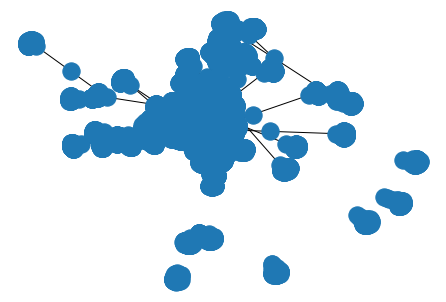

In [46]:
nx.draw(filtered, pos)